In [1]:
from spmf import Spmf
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import ast
pd.options.plotting.backend = "plotly"
import plotly.express as px
# from chart_studio import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.subplots as sp
from sklearn.feature_extraction.text import CountVectorizer
pd.options.display.max_colwidth = None
pd.set_option('display.max_rows', 70)
from pandas.plotting import table 
#import nltk

import nltk
import seaborn as sns
%matplotlib inline
import random
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import NMF
import plotly.io as pio
import json
import pickle

In [2]:
col_list1 = ["user_id", "package_name",'session','user_median_session_length']
data_length1_session = pd.read_csv("data_length1_session_grouped.csv", usecols=col_list1)

In [3]:
data_length1_session['group']='group1'

In [4]:
col_list = ["user_id", "package_name",'session','user_median_session_length']
data_length2_session = pd.read_csv("data_length2_session_grouped.csv", usecols=col_list)

In [5]:
data_length2_session['group']='group2'

In [6]:
col_list2 = ["user_id", "package_name",'session','user_median_session_length']
data_length_other_session = pd.read_csv("data_length_other_session_grouped.csv", usecols=col_list2)

In [7]:
data_length_other_session['group']='group3'

In [15]:
data_length_other_session

user_id                             package_name  session  \
0               8  com.google.android.googlequicksearchbox        0   
1               8                       com.android.chrome        0   
2               8  com.google.android.googlequicksearchbox        0   
3               8                 com.netmarble.sknightsgb        0   
4               8                    com.instagram.android        0   
...           ...                                      ...      ...   
25166108     9994                      com.twitter.android     2919   
25166109     9994                com.nutsplay.slg2.en.ccgg     2920   
25166110     9994                      com.facebook.katana     2920   
25166111     9994                     com.sonymobile.email     2921   
25166112     9994           com.sonyericsson.conversations     2921   

          user_median_session_length   group  
0                                3.0  group3  
1                                3.0  group3  
2                                3.0  group3  
3                                3.0  group3  
4                                3.0  group3  
...                              ...     ...  
25166108                         3.0  group3  
25166109                         3.0  group3  
25166110                         3.0  group3  
25166111                         3.0  group3  
25166112                         3.0  group3  

[25166113 rows x 5 columns]

In [16]:
full_data=pd.concat([data_length1_session,data_length2_session,data_length_other_session],axis=0)

In [17]:
full_data

user_id                      package_name  session  \
0               1   com.sonymobile.moviecreator.rmm        0   
1               1  com.yingwen.photographertoolspro        1   
2               1                   net.osmand.plus        1   
3               1                 com.android.phone        1   
4               1            com.sonyericsson.album        2   
...           ...                               ...      ...   
25166108     9994               com.twitter.android     2919   
25166109     9994         com.nutsplay.slg2.en.ccgg     2920   
25166110     9994               com.facebook.katana     2920   
25166111     9994              com.sonymobile.email     2921   
25166112     9994    com.sonyericsson.conversations     2921   

          user_median_session_length   group  
0                                1.0  group1  
1                                1.0  group1  
2                                1.0  group1  
3                                1.0  group1  
4                                1.0  group1  
...                              ...     ...  
25166108                         3.0  group3  
25166109                         3.0  group3  
25166110                         3.0  group3  
25166111                         3.0  group3  
25166112                         3.0  group3  

[228733596 rows x 5 columns]

In [19]:
full_data.to_csv('full_data_session_length',index=False)

In [2]:
full_data = pd.read_csv('full_data_session_length.csv')

In [3]:
full_data

user_id                      package_name  session  \
0                1   com.sonymobile.moviecreator.rmm        0   
1                1  com.yingwen.photographertoolspro        1   
2                1                   net.osmand.plus        1   
3                1                 com.android.phone        1   
4                1            com.sonyericsson.album        2   
...            ...                               ...      ...   
228733591     9994               com.twitter.android     2919   
228733592     9994         com.nutsplay.slg2.en.ccgg     2920   
228733593     9994               com.facebook.katana     2920   
228733594     9994              com.sonymobile.email     2921   
228733595     9994    com.sonyericsson.conversations     2921   

           user_median_session_length   group  
0                                 1.0  group1  
1                                 1.0  group1  
2                                 1.0  group1  
3                                 1.0  group1  
4                                 1.0  group1  
...                               ...     ...  
228733591                         3.0  group3  
228733592                         3.0  group3  
228733593                         3.0  group3  
228733594                         3.0  group3  
228733595                         3.0  group3  

[228733596 rows x 5 columns]

# N-gram of session length 1 group 

In [8]:
data_length1_session['start']=data_length1_session.groupby('user_id').session.shift(1)!=data_length1_session.session

In [9]:
data_length1_session['end']=data_length1_session.groupby('user_id').session.shift(-1)!=data_length1_session.session

In [10]:
user_corpus_length1_session=data_length1_session.groupby(['user_id','session']).package_name.apply(' '.join)

In [11]:
user_corpus_length1_session_with_start_end='start '+user_corpus_length1_session+ ' end'

In [12]:
print("Number of sessions:",user_corpus_length1_session.shape[0])
print("0.75% of sessions:",user_corpus_length1_session.shape[0]/100*0.75)

Number of sessions: 11689790
0.75% of sessions: 87673.42499999999


In [13]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(1,1),lowercase=False)
vectorization=vectorizer.fit_transform(user_corpus_length1_session_with_start_end.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=87673)[1]]

array(['bbc.mobile.news.uk', 'com.android.chrome', 'com.android.email',
       'com.android.incallui', 'com.ebay.mobile', 'com.facebook.katana',
       'com.facebook.orca', 'com.google.android.apps.maps',
       'com.google.android.apps.messaging', 'com.google.android.gm',
       'com.google.android.googlequicksearchbox',
       'com.google.android.youtube', 'com.instagram.android',
       'com.microsoft.office.outlook', 'com.nianticlabs.pokemongo',
       'com.snapchat.android', 'com.sony.nfx.app.sfrc',
       'com.sonyericsson.album',
       'com.sonyericsson.android.socialphonebook',
       'com.sonyericsson.conversations', 'com.sonyericsson.music',
       'com.sonymobile.calendar', 'com.sonymobile.email',
       'com.spotify.music', 'com.twitter.android', 'com.whatsapp',
       'com.yahoo.mobile.client.android.mail', 'end', 'start'],
      dtype=object)

In [14]:
frequent_apps_length1_grouped=vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=87673)[1]]

In [11]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=87673)[1]]))

Number of frequent patterns: 29


In [12]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(2,2))
vectorization=vectorizer.fit_transform(user_corpus_length1_session.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=87673)[1]]

array(['com.android.chrome com.facebook.katana',
       'com.android.chrome com.google.android.googlequicksearchbox',
       'com.android.chrome com.whatsapp',
       'com.android.incallui com.sonyericsson.android.socialphonebook',
       'com.facebook.katana com.android.chrome',
       'com.facebook.katana com.facebook.orca',
       'com.facebook.katana com.sonyericsson.conversations',
       'com.facebook.katana com.whatsapp',
       'com.facebook.orca com.facebook.katana',
       'com.google.android.googlequicksearchbox com.android.chrome',
       'com.sonyericsson.android.socialphonebook com.android.incallui',
       'com.sonyericsson.conversations com.facebook.katana',
       'com.sonyericsson.conversations com.whatsapp',
       'com.whatsapp com.android.chrome',
       'com.whatsapp com.facebook.katana',
       'com.whatsapp com.sonyericsson.conversations'], dtype=object)

In [13]:
len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=87673)[1]])

16

In [14]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(3,3))
vectorization=vectorizer.fit_transform(user_corpus_length1_session.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=87673)[1]]

array(['com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox'],
      dtype=object)

In [15]:
len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=87673)[1]])

1

In [16]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(4,4))
vectorization=vectorizer.fit_transform(user_corpus_length1_session.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=87673)[1]]

array([], dtype=object)

In [17]:
len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=87673)[1]])

0

# Transition matrix of session length 1 group 

In [18]:
frequent_apps_without_start_end=set(frequent_apps_length1_grouped)
frequent_apps_without_start_end.remove("start")
frequent_apps_without_start_end.remove("end")

In [19]:
df_frequent_app_count = data_length1_session[data_length1_session.package_name.apply(lambda l : l in frequent_apps_without_start_end)].groupby(['package_name'])\
                            .agg({'session':'size'})\
                            .rename(columns={'session':'app_count'})

In [20]:
data_length1_session['next_app'] = data_length1_session.groupby(['user_id','session']).package_name.shift(-1).fillna("end")

In [21]:
df_next_app_count=data_length1_session[data_length1_session.package_name.isin(frequent_apps_without_start_end)].groupby(['package_name','next_app'])\
                            .agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'})

In [22]:
frequent_apps_without_start=set(frequent_apps_length1_grouped)
frequent_apps_without_start.remove("start")

In [23]:
df_numerator = df_next_app_count[df_next_app_count.index.get_level_values('next_app')\
                                 .isin(frequent_apps_without_start)].reset_index()

In [24]:
df_frequent_app_count=df_frequent_app_count\
                .append(pd.DataFrame(data_length1_session.start.sum(),columns=['app_count'],index=['start']))

In [25]:
df_frequent_app_count=df_frequent_app_count.reset_index()

In [26]:
start_numerator=data_length1_session[(data_length1_session.start)&(data_length1_session.package_name.isin(frequent_apps_without_start_end))].groupby(["package_name"]).agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'}).reset_index().rename(columns = {'package_name':'next_app'})
start_numerator['package_name']='start'

In [27]:
df_numerator=df_numerator.append(start_numerator)

In [28]:
df_frequent_app_count=df_frequent_app_count.rename(columns={'index':'package_name'})

In [29]:
df_transaction_s1 = df_numerator.merge(df_frequent_app_count, on='package_name')

In [31]:
df_transaction_s1['probability'] =df_transaction_s1.next_count/df_transaction_s1.app_count*100

df_transaction_s1.drop(['next_count', 'app_count'], axis=1, inplace=True)

#Transaction_matrix = df_transaction.set_index(['package_name','next_app']).stack().unstack(level=1).droplevel(1)

#Transaction_matrix=Transaction_matrix.fillna(0)

In [32]:
df_transaction_s1

package_name                              next_app  probability
0    bbc.mobile.news.uk                    com.android.chrome     8.142725
1    bbc.mobile.news.uk                     com.android.email     0.184892
2    bbc.mobile.news.uk                  com.android.incallui     0.281812
3    bbc.mobile.news.uk                       com.ebay.mobile     0.310888
4    bbc.mobile.news.uk                   com.facebook.katana     6.541318
..                  ...                                   ...          ...
749               start                  com.sonymobile.email     2.429376
750               start                     com.spotify.music     1.153417
751               start                   com.twitter.android     0.816738
752               start                          com.whatsapp    15.115575
753               start  com.yahoo.mobile.client.android.mail     0.523465

[754 rows x 3 columns]

In [33]:
df_transaction_s1.to_csv("df_transaction_s1.csv",index='False')

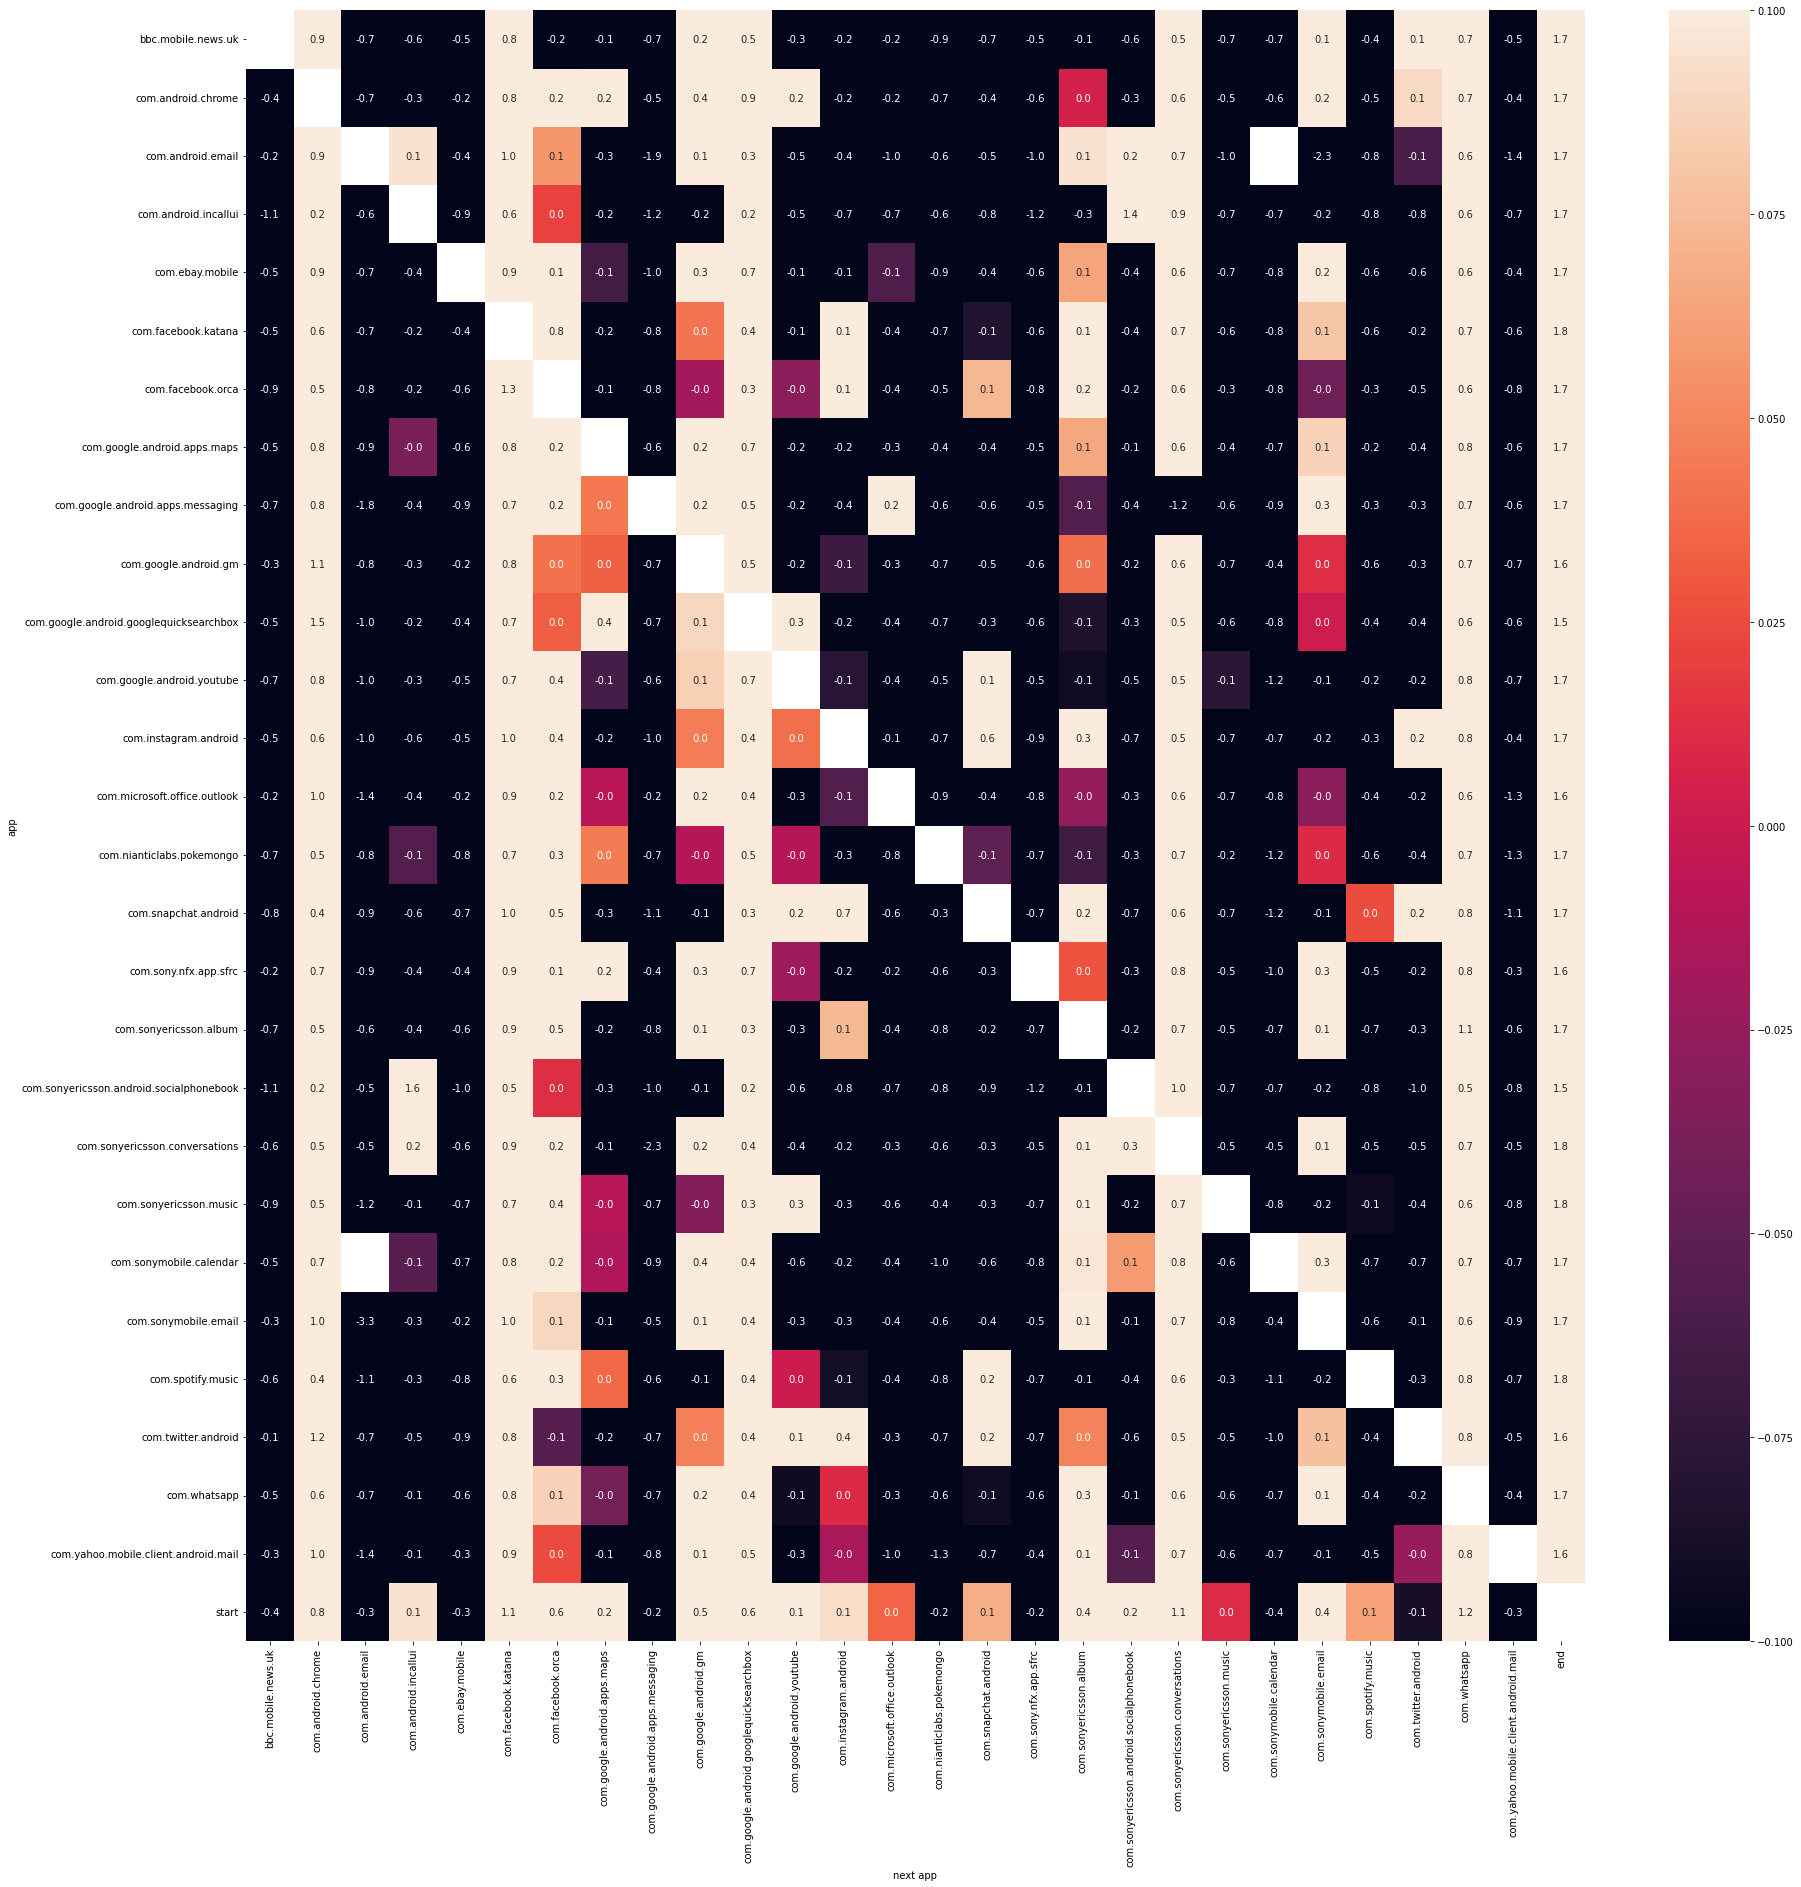

In [34]:
fig, ax = plt.subplots(figsize=(30,30))  
ax = sns.heatmap(np.log10(Transaction_matrix),fmt=".1f", annot=True)
ax.set(xlabel='next app')
ax.set(ylabel='app')
plt.show()

In [41]:
Transaction_matrix.to_csv("Transaction_matrix_length1_session.csv",index='False')

# N-gram of  session length 2 group

In [15]:
data_length2_session['start']=data_length2_session.groupby('user_id').session.shift(1)!=data_length2_session.session

In [16]:
data_length2_session['end']=data_length2_session.groupby('user_id').session.shift(-1)!=data_length2_session.session

In [17]:
user_corpus_length2_session=data_length2_session.groupby(['user_id','session']).package_name.apply(' '.join)

In [18]:
user_corpus_with_start_end_length2_session='start '+user_corpus_length2_session+ ' end'

# N-gram for session length 2 group

In [19]:
print("Number of sessions:",user_corpus_with_start_end_length2_session.shape[0])
print("0.75% of sessions:",user_corpus_with_start_end_length2_session.shape[0]/100*0.75)

Number of sessions: 60142439
0.75% of sessions: 451068.2925


In [20]:
vectorizer_1gram = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(1,1),lowercase=False)

In [21]:
vectorization_1gram=vectorizer_1gram.fit_transform(user_corpus_with_start_end_length2_session.values)

In [22]:
frequent_apps_length2_grouped=vectorizer_1gram.get_feature_names_out()[np.where((vectorization_1gram>0).sum(axis=0)>150356)[1]]
print("Number frequent apps:",len(frequent_apps_length2_grouped))#75
frequent_apps_length2_grouped

Number frequent apps: 75


array(['bbc.mobile.news.uk', 'bbc.mobile.weather', 'com.amazon.kindle',
       'com.amazon.mShop.android.shopping', 'com.amazon.mp3',
       'com.android.chrome', 'com.android.email', 'com.android.incallui',
       'com.android.phone', 'com.barclays.android.barclaysmobilebanking',
       'com.bskyb.skynews.android', 'com.bskyb.sportnews',
       'com.dailymail.online', 'com.ebay.mobile', 'com.facebook.katana',
       'com.facebook.orca', 'com.fitbit.FitbitMobile',
       'com.google.android.apps.docs', 'com.google.android.apps.inbox',
       'com.google.android.apps.maps',
       'com.google.android.apps.messaging',
       'com.google.android.apps.photos', 'com.google.android.calendar',
       'com.google.android.gm', 'com.google.android.gms',
       'com.google.android.googlequicksearchbox',
       'com.google.android.keep', 'com.google.android.music',
       'com.google.android.talk', 'com.google.android.youtube',
       'com.grppl.android.shell.CMBlloydsTSB73',
       'com.grppl.and

In [ ]:
vectorizer_2gram = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(2,2))
vectorization_2gram=vectorizer_2gram.fit_transform(user_corpus_with_start_end_length2_session.values)
print("Number of 2-grams:",len(vectorizer_2gram.get_feature_names_out()[np.where((vectorization_2gram>0).sum(axis=0)>150356)[1]]))#134

In [ ]:
length_2_patterns = vectorizer_2gram.get_feature_names_out()[np.where((vectorization_2gram>0).sum(axis=0)>150356)[1]]
length_2_patterns

In [61]:
vectorizer_3gram = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(3,3))
vectorization_3gram=vectorizer_3gram.fit_transform(user_corpus_length2_session.values)
print("Number of 3-grams:",len(vectorizer_3gram.get_feature_names_out()[np.where((vectorization_3gram>0).sum(axis=0)>104110)[1]]))#30
vectorizer_3gram.get_feature_names_out()[np.where((vectorization_3gram>0).sum(axis=0)>150356)[1]]


Number of 3-grams: 33


array(['com.android.chrome com.facebook.katana com.android.chrome',
       'com.android.chrome com.google.android.googlequicksearchbox com.android.chrome',
       'com.android.chrome com.whatsapp com.android.chrome',
       'com.facebook.katana com.android.chrome com.facebook.katana',
       'com.facebook.katana com.facebook.orca com.facebook.katana',
       'com.facebook.katana com.google.android.googlequicksearchbox com.android.chrome',
       'com.facebook.katana com.sonyericsson.conversations com.facebook.katana',
       'com.facebook.katana com.whatsapp com.facebook.katana',
       'com.facebook.orca com.facebook.katana com.facebook.orca',
       'com.google.android.googlequicksearchbox com.android.chrome com.facebook.katana',
       'com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox',
       'com.google.android.googlequicksearchbox com.android.chrome com.whatsapp',
       'com.sonyericsson.android.socialphonebook com.android.incall

In [62]:
vectorizer_4gram = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(4,4))
vectorization_4gram=vectorizer_4gram.fit_transform(user_corpus_length2_session.values)
print("Number of 4-grams:",len(vectorizer_4gram.get_feature_names_out()[np.where((vectorization_4gram>0).sum(axis=0)>104110)[1]]))
#vectorizer_4gram.get_feature_names_out()[np.where((vectorization_4gram>0).sum(axis=0)>104110)[1]]
vectorizer_4gram.get_feature_names_out()[np.where((vectorization_4gram>0).sum(axis=0)>150356)[1]]#4


Number of 4-grams: 7


array(['com.facebook.katana com.whatsapp com.facebook.katana com.whatsapp',
       'com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox com.android.chrome',
       'com.whatsapp com.facebook.katana com.whatsapp com.facebook.katana'],
      dtype=object)

# Transition Matrix of length 2 group

In [ ]:
frequent_apps_without_start_end=set(frequent_apps_length2_grouped)
frequent_apps_without_start_end.remove("start")
frequent_apps_without_start_end.remove("end")

In [ ]:
df_frequent_app_count = data_length2_session[data_length2_session.package_name.apply(lambda l : l in frequent_apps_without_start_end)].groupby(['package_name'])\
                            .agg({'session':'size'})\
                            .rename(columns={'session':'app_count'})

In [ ]:
data_length2_session['next_app'] = data_length2_session.groupby(['user_id','session']).package_name.shift(-1).fillna("end")

In [ ]:
df_next_app_count=data_length2_session[data_length2_session.package_name.isin(frequent_apps_without_start_end)].groupby(['package_name','next_app'])\
                            .agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'})

In [ ]:
frequent_apps_without_start=set(frequent_apps_length2_grouped)
frequent_apps_without_start.remove("start")

In [ ]:
df_numerator = df_next_app_count[df_next_app_count.index.get_level_values('next_app')\
                                 .isin(frequent_apps_without_start)].reset_index()

In [ ]:
df_frequent_app_count=df_frequent_app_count\
            .append(pd.DataFrame(data_length2_session.start.sum(),columns=['app_count'],index=['start']))

In [ ]:
df_frequent_app_count=df_frequent_app_count.reset_index()

In [ ]:
start_numerator=data_length2_session[(data_length2_session.start)&(data_length2_session.package_name.isin(frequent_apps_without_start_end))].groupby(["package_name"]).agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'}).reset_index().rename(columns = {'package_name':'next_app'})
start_numerator['package_name']='start'

In [ ]:
df_numerator=df_numerator.append(start_numerator)

In [ ]:
df_frequent_app_count=df_frequent_app_count.rename(columns={'index':'package_name'})

In [ ]:
df_transaction_s2 = df_numerator.merge(df_frequent_app_count, on='package_name')

In [ ]:
df_transaction_s2['probability'] =df_transaction_s2.next_count/df_transaction_s2.app_count*100

df_transaction_s2.drop(['next_count', 'app_count'], axis=1, inplace=True)

#Transaction_matrix = df_transaction.set_index(['package_name','next_app']).stack().unstack(level=1).droplevel(1)

#Transaction_matrix=Transaction_matrix.fillna(0)

In [24]:
df_transaction_s2.to_csv('df_transaction_s2.csv',index='False')

In [79]:
fig, ax = plt.subplots(figsize=(30,30))  
ax = sns.heatmap(np.log10(Transaction_matrix),fmt=".1f", annot=True)
ax.set(xlabel='next app')
ax.set(ylabel='app')
plt.show()

In [80]:
Transaction_matrix.to_csv("Transaction_matrix_length2_session.csv",index='False')

# N-gram for length above 2 session group

In [13]:
data_length_other_session = pd.read_csv('data_length_other_session_grouped.csv')

In [23]:
data_length_other_session['start']=data_length_other_session.groupby('user_id').session.shift(1)!=data_length_other_session.session

In [24]:
data_length_other_session['end']=data_length_other_session.groupby('user_id').session.shift(-1)!=data_length_other_session.session

In [25]:
user_corpus_last_group=data_length_other_session.groupby(['user_id','session']).package_name.apply(' '.join)

In [26]:
user_corpus_with_start_end_last_group='start '+user_corpus_last_group+ ' end'

In [27]:
print("Number of sessions:",user_corpus_with_start_end_last_group.shape[0])
print("0.75% of sessions:",user_corpus_with_start_end_last_group.shape[0]/100*0.75)

Number of sessions: 4932851
0.75% of sessions: 36996.3825


In [28]:
vectorizer_1gram = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(1,1),lowercase=False)

In [29]:
vectorization_1gram=vectorizer_1gram.fit_transform(user_corpus_with_start_end_last_group.values)

In [30]:
frequent_apps_other_group=vectorizer_1gram.get_feature_names_out()[np.where((vectorization_1gram>0).sum(axis=0)>12332)[1]]
print("Number frequent apps:",len(frequent_apps_other_group))#77
frequent_apps_other_group

Number frequent apps: 93


array(['bbc.mobile.news.uk', 'bbc.mobile.weather',
       'co.uk.Nationwide.Mobile', 'com.accuweather.android',
       'com.amazon.mShop.android.shopping', 'com.amazon.mp3',
       'com.android.browser', 'com.android.chrome', 'com.android.email',
       'com.android.incallui', 'com.android.phone', 'com.badoo.mobile',
       'com.barclays.android.barclaysmobilebanking', 'com.bskyb.fbscore',
       'com.bskyb.skynews.android', 'com.bskyb.sportnews',
       'com.contextlogic.wish', 'com.dailymail.online', 'com.discord',
       'com.ebay.mobile', 'com.facebook.katana', 'com.facebook.orca',
       'com.fitbit.FitbitMobile', 'com.google.android.apps.docs',
       'com.google.android.apps.genie.geniewidget',
       'com.google.android.apps.inbox',
       'com.google.android.apps.magazines',
       'com.google.android.apps.maps',
       'com.google.android.apps.messaging',
       'com.google.android.apps.photos', 'com.google.android.apps.plus',
       'com.google.android.calendar', 'com.google

In [91]:
vectorizer_2gram = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(2,2))
vectorization_2gram=vectorizer_2gram.fit_transform(user_corpus_last_group.values)
print("Number of 2-grams:",len(vectorizer_2gram.get_feature_names_out()[np.where((vectorization_2gram>0).sum(axis=0)>12332)[1]]))#134

Number of 2-grams: 176


In [92]:
vectorizer_3gram = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(3,3))
vectorization_3gram=vectorizer_3gram.fit_transform(user_corpus_last_group.values)
print("Number of 3-grams:",len(vectorizer_3gram.get_feature_names_out()[np.where((vectorization_3gram>0).sum(axis=0)>12332)[1]]))#30
length_3_patterns = vectorizer_3gram.get_feature_names_out()[np.where((vectorization_3gram>0).sum(axis=0)>12332)[1]]
length_3_patterns

Number of 3-grams: 91


array(['com.android.chrome com.facebook.katana com.android.chrome',
       'com.android.chrome com.facebook.katana com.facebook.orca',
       'com.android.chrome com.facebook.katana com.whatsapp',
       'com.android.chrome com.facebook.orca com.facebook.katana',
       'com.android.chrome com.google.android.googlequicksearchbox com.android.chrome',
       'com.android.chrome com.google.android.googlequicksearchbox com.facebook.katana',
       'com.android.chrome com.whatsapp com.android.chrome',
       'com.android.chrome com.whatsapp com.facebook.katana',
       'com.facebook.katana com.android.chrome com.facebook.katana',
       'com.facebook.katana com.facebook.orca com.android.chrome',
       'com.facebook.katana com.facebook.orca com.facebook.katana',
       'com.facebook.katana com.facebook.orca com.instagram.android',
       'com.facebook.katana com.facebook.orca com.snapchat.android',
       'com.facebook.katana com.facebook.orca com.whatsapp',
       'com.facebook.katana com.

In [93]:
vectorizer_4gram = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(4,4))
vectorization_4gram=vectorizer_4gram.fit_transform(user_corpus_last_group.values)
print("Number of 4-grams:",len(vectorizer_4gram.get_feature_names_out()[np.where((vectorization_4gram>0).sum(axis=0)>12332)[1]]))
#vectorizer_4gram.get_feature_names_out()[np.where((vectorization_4gram>0).sum(axis=0)>104110)[1]]
length_4_patterns = vectorizer_4gram.get_feature_names_out()[np.where((vectorization_4gram>0).sum(axis=0)>12332)[1]]#4
length_4_patterns

Number of 4-grams: 10


array(['com.android.chrome com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox',
       'com.facebook.katana com.facebook.orca com.facebook.katana com.facebook.orca',
       'com.facebook.katana com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox',
       'com.facebook.katana com.whatsapp com.facebook.katana com.whatsapp',
       'com.facebook.orca com.facebook.katana com.facebook.orca com.facebook.katana',
       'com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox com.android.chrome',
       'com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox com.facebook.katana',
       'com.instagram.android com.snapchat.android com.instagram.android com.snapchat.android',
       'com.snapchat.android com.instagram.android com.snapchat.android com.instagram.android',
       'com.whatsapp com.facebook.katana com.w

In [96]:
vectorizer_5gram = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(5,5))
vectorization_5gram=vectorizer_5gram.fit_transform(user_corpus_last_group.values)
print("Number of 5-grams:",len(vectorizer_5gram.get_feature_names_out()[np.where((vectorization_5gram>0).sum(axis=0)>12332)[1]]))
#vectorizer_5gram.get_feature_names_out()[np.where((vectorization_5gram>0).sum(axis=0)>191938)[1]]
length_5_patterns = vectorizer_5gram.get_feature_names_out()[np.where((vectorization_5gram>0).sum(axis=0)>12332)[1]]
length_5_patterns

Number of 5-grams: 0


array([], dtype=object)

# Transition matrix for group with session length above 2

In [14]:
frequent_apps_without_start_end=set(frequent_apps)
frequent_apps_without_start_end.remove("start")
frequent_apps_without_start_end.remove("end")

In [81]:
len(frequent_apps_without_start_end)

93

In [15]:
df_frequent_app_count = data_length_other_session[data_length_other_session.package_name.apply(lambda l : l in frequent_apps_without_start_end)].groupby(['package_name'])\
                            .agg({'session':'size'})\
                            .rename(columns={'session':'app_count'})

In [16]:
data_length_other_session['next_app'] = data_length_other_session.groupby(['user_id','session']).package_name.shift(-1).fillna("end")

In [17]:
df_next_app_count=data_length_other_session[data_length_other_session.package_name.isin(frequent_apps_without_start_end)].groupby(['package_name','next_app'])\
                            .agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'})

In [18]:
frequent_apps_without_start=set(frequent_apps)
frequent_apps_without_start.remove("start")

In [19]:
df_numerator = df_next_app_count[df_next_app_count.index.get_level_values('next_app')\
                                 .isin(frequent_apps_without_start)].reset_index()

In [20]:
df_frequent_app_count=df_frequent_app_count.append(pd.DataFrame(data_length_other_session.start.sum(),columns=['app_count'],index=['start']))

In [21]:
df_frequent_app_count=df_frequent_app_count.reset_index()

In [22]:
start_numerator=data_length_other_session[(data_length_other_session.start)&(data_length_other_session.package_name.isin(frequent_apps_without_start_end))].groupby(["package_name"]).agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'}).reset_index().rename(columns = {'package_name':'next_app'})
start_numerator['package_name']='start'

In [23]:
df_numerator=df_numerator.append(start_numerator)

In [24]:
df_frequent_app_count=df_frequent_app_count.rename(columns={'index':'package_name'})

In [25]:
df_transaction_s3 = df_numerator.merge(df_frequent_app_count, on='package_name')

In [26]:
df_transaction_s3['probability'] =df_transaction_s3.next_count/df_transaction_s3.app_count*100

df_transaction_s3.drop(['next_count', 'app_count'], axis=1, inplace=True)

#Transaction_matrix = df_transaction.set_index(['package_name','next_app']).stack().unstack(level=1).droplevel(1)

#Transaction_matrix=Transaction_matrix.fillna(0)

In [29]:
df_transaction_s3.to_csv('df_transaction_s3.csv',index='False')

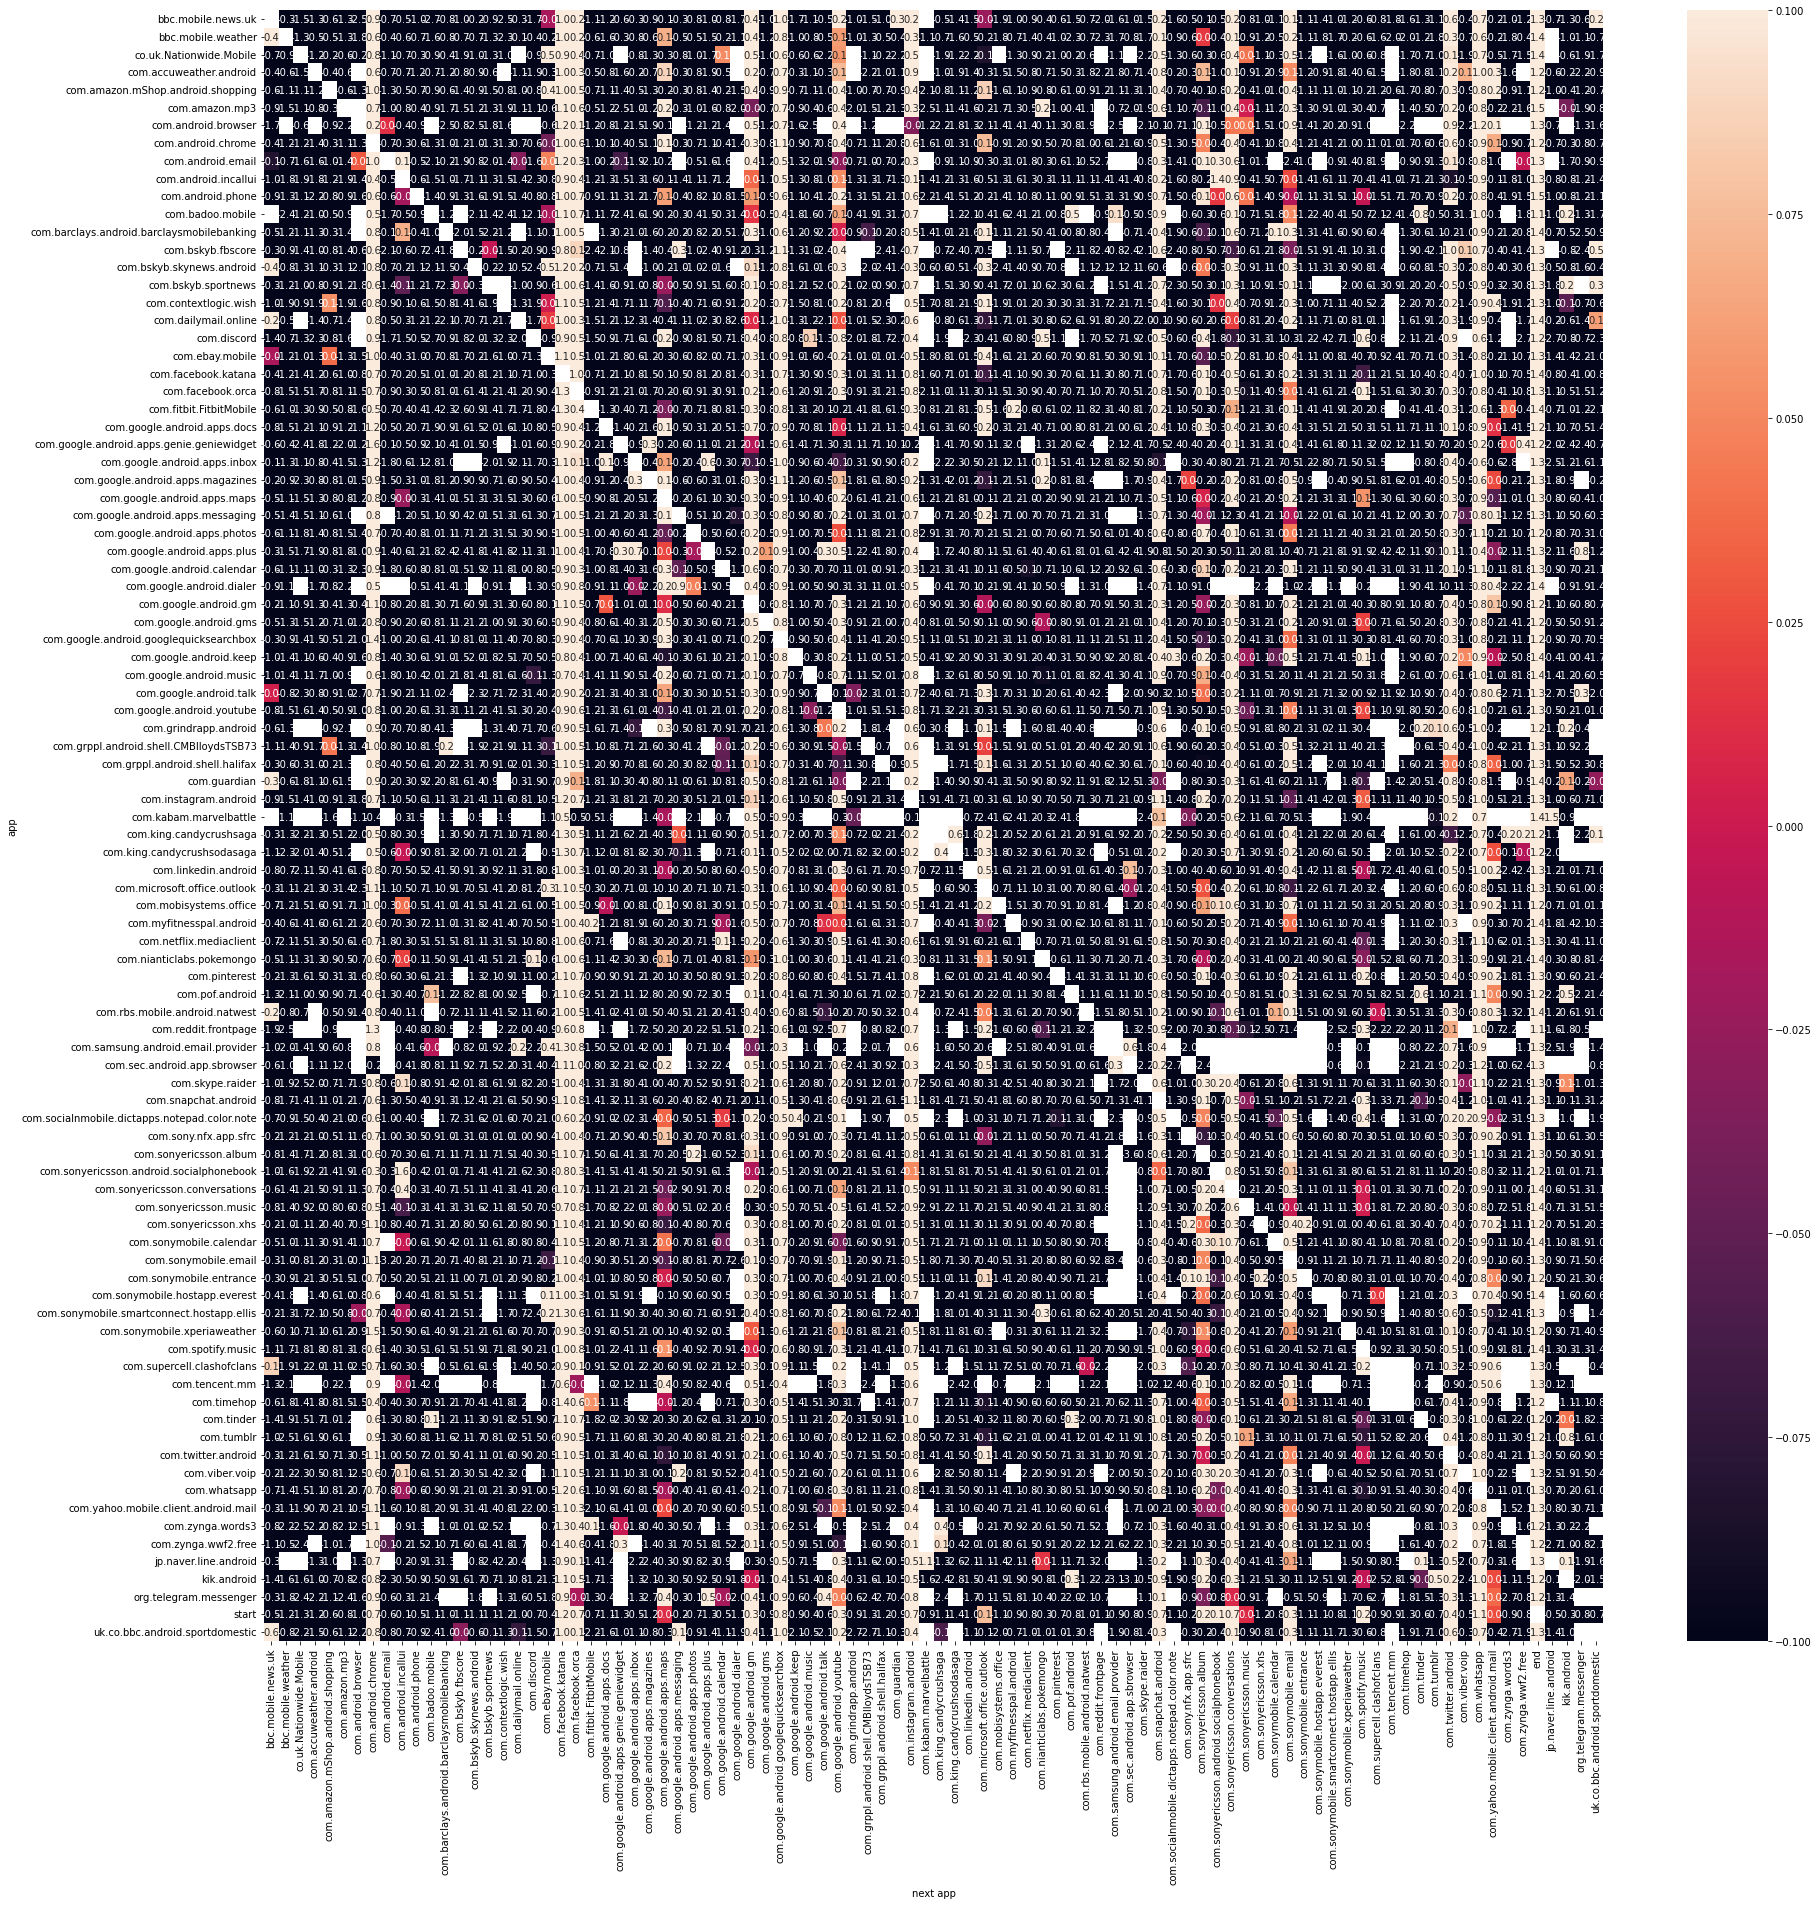

In [108]:
fig, ax = plt.subplots(figsize=(30,30))  
ax = sns.heatmap(np.log10(Transaction_matrix),fmt=".1f", annot=True)
ax.set(xlabel='next app')
ax.set(ylabel='app')
plt.show()

In [109]:
Transaction_matrix.to_csv("Transaction_matrix_length_above2_session_group.csv",index='False')

# NMF for different 3 groups 

First we read the transition matrix we made for three groups.

In [108]:
df_transaction_s1 = pd.read_csv('df_transaction_s1_all_fre_apps.csv')
df_transaction_s2 = pd.read_csv('df_transaction_s2_all_fre_apps.csv')
df_transaction_s3 = pd.read_csv('df_transaction_s3_fre_apps.csv')

In [59]:
df_transaction_s1

Unnamed: 0        package_name                           next_app  \
0              0  bbc.mobile.news.uk                 bbc.mobile.weather   
1              1  bbc.mobile.news.uk            co.uk.Nationwide.Mobile   
2              2  bbc.mobile.news.uk            com.accuweather.android   
3              3  bbc.mobile.news.uk                  com.amazon.kindle   
4              4  bbc.mobile.news.uk  com.amazon.mShop.android.shopping   
...          ...                 ...                                ...   
7817        7817               start              jp.naver.line.android   
7818        7818               start                        kik.android   
7819        7819               start             org.telegram.messenger   
7820        7820               start     uk.co.bbc.android.iplayerradio   
7821        7821               start    uk.co.bbc.android.sportdomestic   

      probability  
0        1.367310  
1        0.013420  
2        0.020875  
3        0.102138  
4        0.224406  
...           ...  
7817     0.074963  
7818     0.164990  
7819     0.033431  
7820     0.240629  
7821     0.214101  

[7822 rows x 4 columns]

In [60]:
df_transaction_s2

Unnamed: 0        package_name                           next_app  \
0              0  bbc.mobile.news.uk                 bbc.mobile.weather   
1              1  bbc.mobile.news.uk            co.uk.Nationwide.Mobile   
2              2  bbc.mobile.news.uk            com.accuweather.android   
3              3  bbc.mobile.news.uk                  com.amazon.kindle   
4              4  bbc.mobile.news.uk  com.amazon.mShop.android.shopping   
...          ...                 ...                                ...   
8665        8665               start              jp.naver.line.android   
8666        8666               start                        kik.android   
8667        8667               start             org.telegram.messenger   
8668        8668               start     uk.co.bbc.android.iplayerradio   
8669        8669               start    uk.co.bbc.android.sportdomestic   

      probability  
0        0.993637  
1        0.065267  
2        0.069666  
3        0.094730  
4        0.324904  
...           ...  
8665     0.143807  
8666     0.197529  
8667     0.072834  
8668     0.144678  
8669     0.248854  

[8670 rows x 4 columns]

In [84]:
df_transaction_s3

Unnamed: 0        package_name                           next_app  \
0              0  bbc.mobile.news.uk                 bbc.mobile.weather   
1              1  bbc.mobile.news.uk            co.uk.Nationwide.Mobile   
2              2  bbc.mobile.news.uk            com.accuweather.android   
3              3  bbc.mobile.news.uk                  com.amazon.kindle   
4              4  bbc.mobile.news.uk  com.amazon.mShop.android.shopping   
...          ...                 ...                                ...   
8195        8195               start              jp.naver.line.android   
8196        8196               start                        kik.android   
8197        8197               start             org.telegram.messenger   
8198        8198               start     uk.co.bbc.android.iplayerradio   
8199        8199               start    uk.co.bbc.android.sportdomestic   

      probability  
0        0.555971  
1        0.030326  
2        0.054586  
3        0.034369  
4        0.251703  
...           ...  
8195     0.349514  
8196     0.456024  
8197     0.168584  
8198     0.087779  
8199     0.187539  

[8200 rows x 4 columns]

In [109]:
df_transaction_s1 = df_transaction_s1.drop('Unnamed: 0', 1)
df_transaction_s2 = df_transaction_s2.drop('Unnamed: 0', 1)
df_transaction_s3 = df_transaction_s3.drop('Unnamed: 0', 1)

<ipython-input-109-f1dcd37e205b>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_transaction_s1 = df_transaction_s1.drop('Unnamed: 0', 1)
<ipython-input-109-f1dcd37e205b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_transaction_s2 = df_transaction_s2.drop('Unnamed: 0', 1)
<ipython-input-109-f1dcd37e205b>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_transaction_s3 = df_transaction_s3.drop('Unnamed: 0', 1)


In [111]:
df_transaction_s3_top=df_transaction_s3.nlargest(300,'probability')
df_transaction_s1_top=df_transaction_s1.nlargest(300,'probability')
df_transaction_s2_top=df_transaction_s2.nlargest(300,'probability')

# Visiulize the transition matrix

We will recreate the transition matrix based on the frequent apps of all three groups first. 
Then we will choose the top 1000 transitions for comparision visualization  

In [33]:
frequent_apps_length1_grouped

array(['bbc.mobile.news.uk', 'com.android.chrome', 'com.android.email',
       'com.android.incallui', 'com.ebay.mobile', 'com.facebook.katana',
       'com.facebook.orca', 'com.google.android.apps.maps',
       'com.google.android.apps.messaging', 'com.google.android.gm',
       'com.google.android.googlequicksearchbox',
       'com.google.android.youtube', 'com.instagram.android',
       'com.microsoft.office.outlook', 'com.nianticlabs.pokemongo',
       'com.snapchat.android', 'com.sony.nfx.app.sfrc',
       'com.sonyericsson.album',
       'com.sonyericsson.android.socialphonebook',
       'com.sonyericsson.conversations', 'com.sonyericsson.music',
       'com.sonymobile.calendar', 'com.sonymobile.email',
       'com.spotify.music', 'com.twitter.android', 'com.whatsapp',
       'com.yahoo.mobile.client.android.mail', 'end', 'start'],
      dtype=object)

In [31]:
 freuqent_apps = set(frequent_apps_length1_grouped).union(set(frequent_apps_length2_grouped),set(frequent_apps_other_group))

In [32]:
with open('frequent_apps_session_length.txt','wb') as f:
    pickle.dump(freuqent_apps, f)

##To read it again from file

In [6]:
with open('frequent_apps_session_length.txt','rb') as f:
    freuqent_apps = pickle.load(f)

# Transition Matrix of three group wrt the union of frequent apps for comparision visiualization

## group1

In [86]:
frequent_apps_without_start_end=set(freuqent_apps)
frequent_apps_without_start_end.remove("start")
frequent_apps_without_start_end.remove("end")

In [105]:
data_length1_session[data_length1_session.package_name.apply(lambda l : l in frequent_apps_without_start_end)].package_name.nunique()

93

In [106]:
data_length2_session[data_length2_session.package_name.apply(lambda l : l in frequent_apps_without_start_end)].package_name.nunique()

93

In [107]:
data_length_other_session[data_length_other_session.package_name.apply(lambda l : l in frequent_apps_without_start_end)].package_name.nunique()

93

In [87]:
df_frequent_app_count = data_length1_session[data_length1_session.package_name.apply(lambda l : l in frequent_apps_without_start_end)].groupby(['package_name'])\
                            .agg({'session':'size'})\
                            .rename(columns={'session':'app_count'})

In [88]:
data_length1_session['next_app'] = data_length1_session.groupby(['user_id','session']).package_name.shift(-1).fillna("end")

In [89]:
df_next_app_count=data_length1_session[data_length1_session.package_name.isin(frequent_apps_without_start_end)].groupby(['package_name','next_app'])\
                            .agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'})

In [90]:
frequent_apps_without_start=set(freuqent_apps)
frequent_apps_without_start.remove("start")

In [91]:
df_numerator = df_next_app_count[df_next_app_count.index.get_level_values('next_app')\
                                 .isin(frequent_apps_without_start)].reset_index()

In [94]:
df_frequent_app_count=df_frequent_app_count\
            .append(pd.DataFrame(data_length1_session.start.sum(),columns=['app_count'],index=['start']))

In [95]:
df_frequent_app_count=df_frequent_app_count.reset_index()

In [96]:
start_numerator=data_length1_session[(data_length1_session.start)&(data_length1_session.package_name\
                            .isin(frequent_apps_without_start_end))].groupby(["package_name"]).agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'}).reset_index().rename(columns = {'package_name':'next_app'})
start_numerator['package_name']='start'

In [98]:
df_numerator=df_numerator.append(start_numerator)

In [100]:
df_frequent_app_count=df_frequent_app_count.rename(columns={'index':'package_name'})

In [101]:
df_transaction_s1 = df_numerator.merge(df_frequent_app_count, on='package_name')

In [74]:
df_transaction_s1['probability'] =df_transaction_s1.next_count/df_transaction_s1.app_count*100

df_transaction_s1.drop(['next_count', 'app_count'], axis=1, inplace=True)

#Transaction_matrix_s2 = df_transaction.set_index(['package_name','next_app']).stack().unstack(level=1).droplevel(1)

#Transaction_matrix=Transaction_matrix.fillna(0)

In [79]:
#Transaction_matrix_s1 = df_transaction_s1.set_index(['package_name','next_app']).stack().unstack(level=1).droplevel(1)

Transaction_matrix_s1=df_transaction_s1.fillna(0)

In [57]:
Transaction_matrix_s1.to_csv('df_transaction_s1_all_fre_apps.csv',index='False')

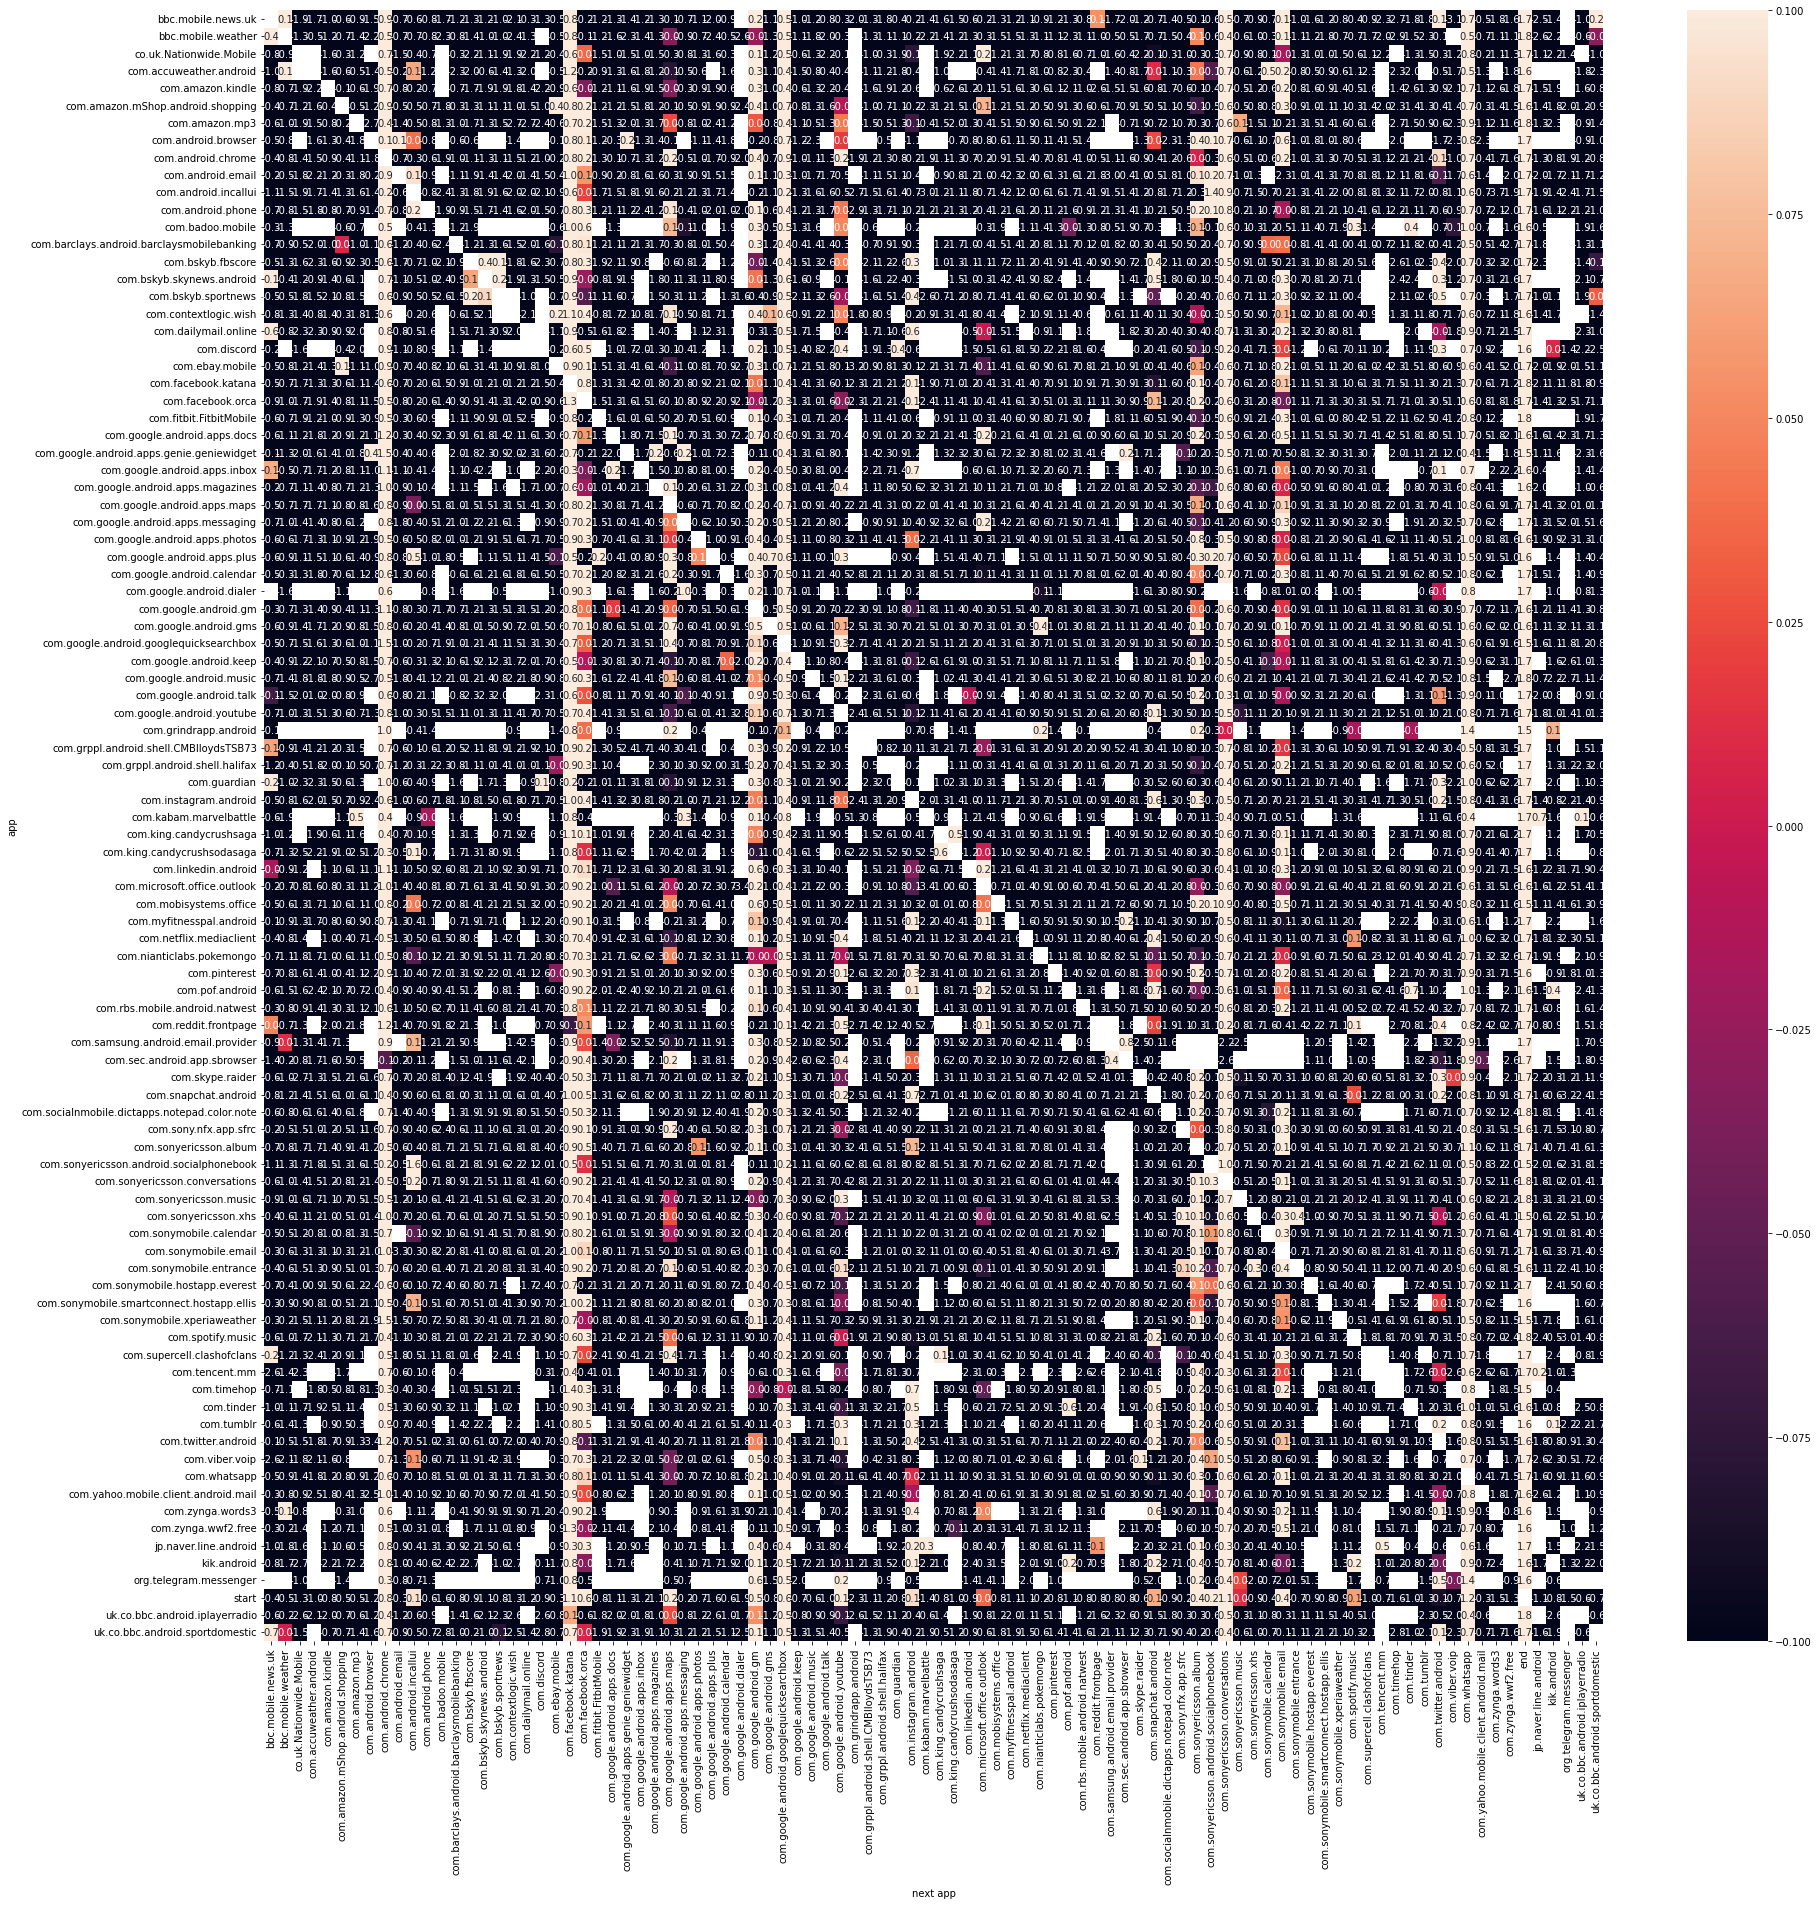

In [34]:
fig, ax = plt.subplots(figsize=(30,30))  
ax = sns.heatmap(np.log10(Transaction_matrix_s1),fmt=".1f", annot=True)
ax.set(xlabel='next app')
ax.set(ylabel='app')
plt.show()

## Group2

In [40]:
# Transition Matrix of three group wrt the union of frequent apps 

frequent_apps_without_start_end=set(freuqent_apps)
frequent_apps_without_start_end.remove("start")
frequent_apps_without_start_end.remove("end")

df_frequent_app_count = data_length2_session[data_length2_session.package_name.apply(lambda l : l in frequent_apps_without_start_end)].groupby(['package_name'])\
                            .agg({'session':'size'})\
                            .rename(columns={'session':'app_count'})

data_length2_session['next_app'] = data_length2_session.groupby(['user_id','session']).package_name.shift(-1).fillna("end")

df_next_app_count=data_length2_session[data_length2_session.package_name.isin(frequent_apps_without_start_end)].groupby(['package_name','next_app'])\
                            .agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'})

frequent_apps_without_start=set(freuqent_apps)
frequent_apps_without_start.remove("start")

df_numerator = df_next_app_count[df_next_app_count.index.get_level_values('next_app')\
                                 .isin(frequent_apps_without_start)].reset_index()

df_frequent_app_count=df_frequent_app_count\
            .append(pd.DataFrame(data_length2_session.start.sum(),columns=['app_count'],index=['start']))

df_frequent_app_count=df_frequent_app_count.reset_index()

start_numerator=data_length2_session[(data_length2_session.start)&(data_length2_session.package_name.isin(frequent_apps_without_start_end))].groupby(["package_name"]).agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'}).reset_index().rename(columns = {'package_name':'next_app'})
start_numerator['package_name']='start'

df_numerator=df_numerator.append(start_numerator)

df_frequent_app_count=df_frequent_app_count.rename(columns={'index':'package_name'})

df_transaction_s2 = df_numerator.merge(df_frequent_app_count, on='package_name')

df_transaction_s2['probability'] =df_transaction_s2.next_count/df_transaction_s2.app_count*100

df_transaction_s2.drop(['next_count', 'app_count'], axis=1, inplace=True)

#Transaction_matrix_s2 = df_transaction.set_index(['package_name','next_app']).stack().unstack(level=1).droplevel(1)

#Transaction_matrix=Transaction_matrix.fillna(0)

#Transaction_matrix_s2 = df_transaction_s2.set_index(['package_name','next_app']).stack().unstack(level=1).droplevel(1)

Transaction_matrix_s2 = df_transaction_s2.fillna(0)

Transaction_matrix_s2.to_csv('df_transaction_s2_all_fre_apps.csv',index='False')

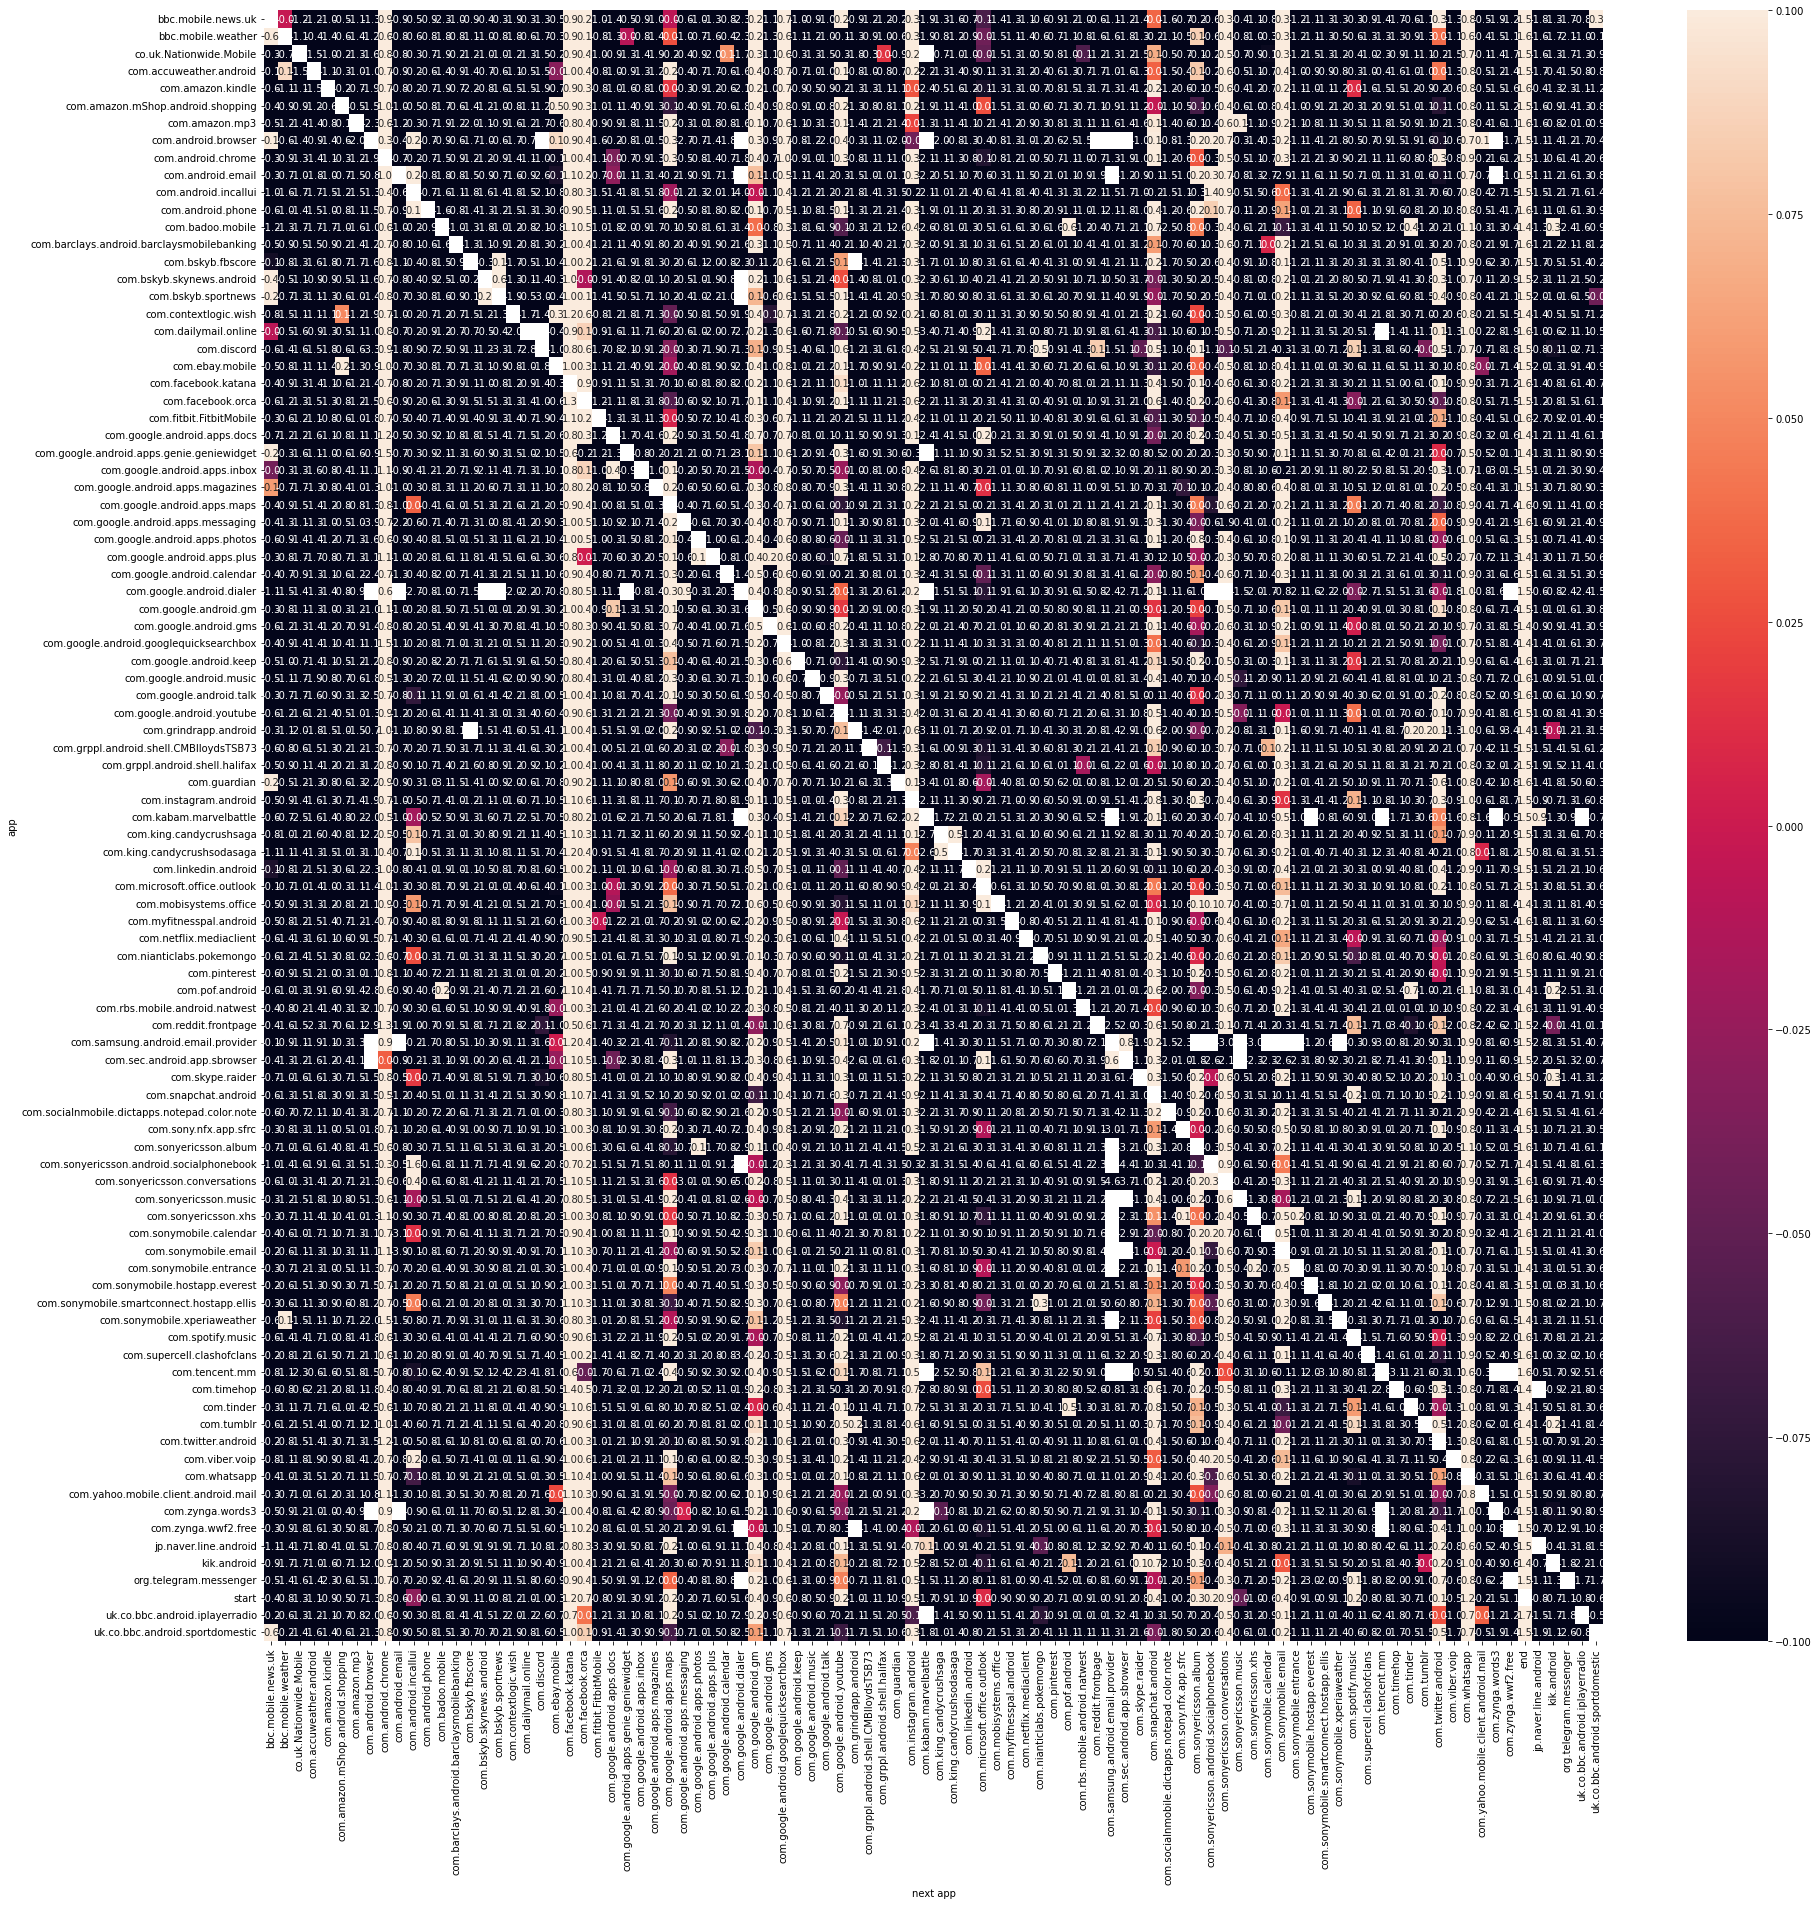

In [10]:
fig, ax = plt.subplots(figsize=(30,30))  
ax = sns.heatmap(np.log10(Transaction_matrix_s2),fmt=".1f", annot=True)
ax.set(xlabel='next app')
ax.set(ylabel='app')
plt.show()

## Group 3

In [82]:
# Transition matrix for group with session length above 2

frequent_apps_without_start_end=set(freuqent_apps)
frequent_apps_without_start_end.remove("start")
frequent_apps_without_start_end.remove("end")

df_frequent_app_count = data_length_other_session[data_length_other_session.package_name.apply(lambda l : l in frequent_apps_without_start_end)].groupby(['package_name'])\
                            .agg({'session':'size'})\
                            .rename(columns={'session':'app_count'})

data_length_other_session['next_app'] = data_length_other_session.groupby(['user_id','session']).package_name.shift(-1).fillna("end")

df_next_app_count=data_length_other_session[data_length_other_session.package_name.isin(frequent_apps_without_start_end)].groupby(['package_name','next_app'])\
                            .agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'})

frequent_apps_without_start=set(freuqent_apps)
frequent_apps_without_start.remove("start")

df_numerator = df_next_app_count[df_next_app_count.index.get_level_values('next_app')\
                                 .isin(frequent_apps_without_start)].reset_index()

df_frequent_app_count=df_frequent_app_count.append(pd.DataFrame(data_length_other_session.start.sum(),columns=['app_count'],index=['start']))

df_frequent_app_count=df_frequent_app_count.reset_index()

start_numerator=data_length_other_session[(data_length_other_session.start)&(data_length_other_session.package_name.isin(frequent_apps_without_start_end))].groupby(["package_name"]).agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'}).reset_index().rename(columns = {'package_name':'next_app'})
start_numerator['package_name']='start'

df_numerator=df_numerator.append(start_numerator)

df_frequent_app_count=df_frequent_app_count.rename(columns={'index':'package_name'})

df_transaction_s3 = df_numerator.merge(df_frequent_app_count, on='package_name')

df_transaction_s3['probability'] =df_transaction_s3.next_count/df_transaction_s3.app_count*100

df_transaction_s3.drop(['next_count', 'app_count'], axis=1, inplace=True)

#Transaction_matrix = df_transaction_s3.set_index(['package_name','next_app']).stack().unstack(level=1).droplevel(1)

#Transaction_matrix=df_transaction_s3.fillna(0)

df_transaction_s3.to_csv('df_transaction_s3_fre_apps.csv',index='False')

In [85]:
df_numerator

package_name                           next_app  next_count
0   bbc.mobile.news.uk                 bbc.mobile.weather         550
1   bbc.mobile.news.uk            co.uk.Nationwide.Mobile          30
2   bbc.mobile.news.uk            com.accuweather.android          54
3   bbc.mobile.news.uk                  com.amazon.kindle          34
4   bbc.mobile.news.uk  com.amazon.mShop.android.shopping         249
..                 ...                                ...         ...
88               start              jp.naver.line.android       17241
89               start                        kik.android       22495
90               start             org.telegram.messenger        8316
91               start     uk.co.bbc.android.iplayerradio        4330
92               start    uk.co.bbc.android.sportdomestic        9251

[8200 rows x 3 columns]

# Transition for full labeled data with pivot table

In [4]:
full_data['start']=full_data.groupby('user_id').session.shift(1)!=full_data.session

full_data['end']=full_data.groupby('user_id').session.shift(-1)!=full_data.session

user_corpus_full_data=full_data.groupby(['user_id','session']).package_name.apply(' '.join)

user_corpus_with_start_end_full_data='start '+user_corpus_full_data+ ' end'

In [7]:

frequent_apps_without_start_end=set(freuqent_apps)
frequent_apps_without_start_end.remove("start")
frequent_apps_without_start_end.remove("end")

In [23]:

df_frequent_app_count = full_data[full_data.package_name.apply(lambda l : l in frequent_apps_without_start_end)].groupby(['group','package_name'])\
                            .agg({'session':'size'})\
                            .rename(columns={'session':'app_count'})

In [10]:
full_data['next_app'] = full_data.groupby(['group','user_id','session']).package_name.shift(-1).fillna("end")

In [13]:
df_next_app_count=full_data[full_data.package_name.isin(frequent_apps_without_start_end)].groupby(['group','package_name','next_app'])\
                            .agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'})

In [15]:

frequent_apps_without_start=set(freuqent_apps)
frequent_apps_without_start.remove("start")

In [31]:
individual_start_count=full_data.groupby(['group']).start.sum().reset_index()#,columns=['app_count'],index=['user_id','start'])
individual_start_count['package_name']='start'
individual_start_count=individual_start_count.rename(columns={'start':'app_count'})

In [32]:
df_numerator = df_next_app_count[df_next_app_count.index.get_level_values('next_app')\
                                 .isin(frequent_apps_without_start)].reset_index()

In [35]:
df_frequent_app_count=df_frequent_app_count.append(individual_start_count.set_index(['group','package_name']))
df_frequent_app_count=df_frequent_app_count.reset_index()

In [37]:
start_numerator=full_data[(full_data.start)&(full_data.package_name.isin(frequent_apps_without_start_end))].groupby(['group',"package_name"]).agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'}).reset_index().rename(columns = {'package_name':'next_app'})
start_numerator['package_name']='start'


In [39]:
df_numerator=df_numerator.append(start_numerator)

df_frequent_app_count=df_frequent_app_count.rename(columns={'index':'package_name'})

df_transaction_s3 = df_numerator.merge(df_frequent_app_count, on=['group','package_name'])

df_transaction_s3['probability'] =df_transaction_s3.next_count/df_transaction_s3.app_count*100

df_transaction_s3.drop(['next_count', 'app_count'], axis=1, inplace=True)

In [41]:
df_transaction_s3.to_csv('full_data_fre_apps.csv',index='False')

# Visualization for full data wrt all frequent apps

In [76]:
df_transaction_s3 = pd.read_csv('full_data_fre_apps.csv')

In [77]:
df_transaction_s3=df_transaction_s3.drop('Unnamed: 0', 1)

<ipython-input-77-224d057aa6e1>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_transaction_s3=df_transaction_s3.drop('Unnamed: 0', 1)


In [78]:
df_transaction_s3['transition'] = df_transaction_s3["package_name"] +  ' - '+ df_transaction_s3["next_app"] 

In [79]:
commoparable_transitions=df_transaction_s3.pivot(index=['package_name','next_app'],columns='group',values='probability')

In [80]:
df_transaction_s3

group        package_name                           next_app  \
0      group1  bbc.mobile.news.uk                 bbc.mobile.weather   
1      group1  bbc.mobile.news.uk            co.uk.Nationwide.Mobile   
2      group1  bbc.mobile.news.uk            com.accuweather.android   
3      group1  bbc.mobile.news.uk                  com.amazon.kindle   
4      group1  bbc.mobile.news.uk  com.amazon.mShop.android.shopping   
...       ...                 ...                                ...   
24687  group3               start              jp.naver.line.android   
24688  group3               start                        kik.android   
24689  group3               start             org.telegram.messenger   
24690  group3               start     uk.co.bbc.android.iplayerradio   
24691  group3               start    uk.co.bbc.android.sportdomestic   

       probability                                              transition  
0         1.367310                 bbc.mobile.news.uk - bbc.mobile.weather  
1         0.013420            bbc.mobile.news.uk - co.uk.Nationwide.Mobile  
2         0.020875            bbc.mobile.news.uk - com.accuweather.android  
3         0.102138                  bbc.mobile.news.uk - com.amazon.kindle  
4         0.224406  bbc.mobile.news.uk - com.amazon.mShop.android.shopping  
...            ...                                                     ...  
24687     0.349514                           start - jp.naver.line.android  
24688     0.456024                                     start - kik.android  
24689     0.168584                          start - org.telegram.messenger  
24690     0.087779                  start - uk.co.bbc.android.iplayerradio  
24691     0.187539                 start - uk.co.bbc.android.sportdomestic  

[24692 rows x 5 columns]

In [66]:
df_transaction_s3_top=df_transaction_s3.nlargest(1000,'probability')

In [81]:
df_transaction_s3_top_index = df_transaction_s3_top.set_index(['package_name','next_app']).index

In [83]:
commoparable_transitions_top = commoparable_transitions.loc[df_transaction_s3_top_index]

In [91]:
commoparable_transitions_top

group                                                                                     group1  \
package_name                                  next_app                                             
uk.co.bbc.android.iplayerradio                end                                      69.627760   
com.spotify.music                             end                                      59.407374   
com.sonyericsson.conversations                end                                      58.864732   
com.socialnmobile.dictapps.notepad.color.note end                                      58.199447   
com.google.android.music                      end                                      57.864589   
...                                                                                          ...   
com.pinterest                                 com.sonyericsson.conversations            5.354539   
com.google.android.gms                        com.whatsapp                              3.998290   
com.grppl.android.shell.CMBlloydsTSB73        com.whatsapp                              3.255679   
com.android.browser                           com.google.android.googlequicksearchbox   4.498619   
com.google.android.music                      com.google.android.googlequicksearchbox   3.013583   

group                                                                                     group2  \
package_name                                  next_app                                             
uk.co.bbc.android.iplayerradio                end                                      47.938914   
com.spotify.music                             end                                      41.160108   
com.sonyericsson.conversations                end                                      39.618599   
com.socialnmobile.dictapps.notepad.color.note end                                      41.062661   
com.google.android.music                      end                                      43.882866   
...                                                                                          ...   
com.pinterest                                 com.sonyericsson.conversations            3.414218   
com.google.android.gms                        com.whatsapp                              5.354442   
com.grppl.android.shell.CMBlloydsTSB73        com.whatsapp                              5.351862   
com.android.browser                           com.google.android.googlequicksearchbox   4.730251   
com.google.android.music                      com.google.android.googlequicksearchbox   3.948380   

group                                                                                     group3  
package_name                                  next_app                                            
uk.co.bbc.android.iplayerradio                end                                      34.631963  
com.spotify.music                             end                                      25.220323  
com.sonyericsson.conversations                end                                      23.977412  
com.socialnmobile.dictapps.notepad.color.note end                                      20.727322  
com.google.android.music                      end                                      24.048490  
...                                                                                          ...  
com.pinterest                                 com.sonyericsson.conversations            2.097295  
com.google.android.gms                        com.whatsapp                              5.863093  
com.grppl.android.shell.CMBlloydsTSB73        com.whatsapp                              9.674652  
com.android.browser                           com.google.android.googlequicksearchbox   5.350714  
com.google.android.music                      com.google.android.googlequicksearchbox   5.344521  

[1000 rows x 3 columns]

In [108]:
new_cols=[('{}-> {}'.format(i[0], i[1]))for i in commoparable_transitions_top.index]

In [112]:
commoparable_transitions_top['transition']=new_cols

In [116]:
commoparable_transitions_top = commoparable_transitions_top.sort_values('transition')

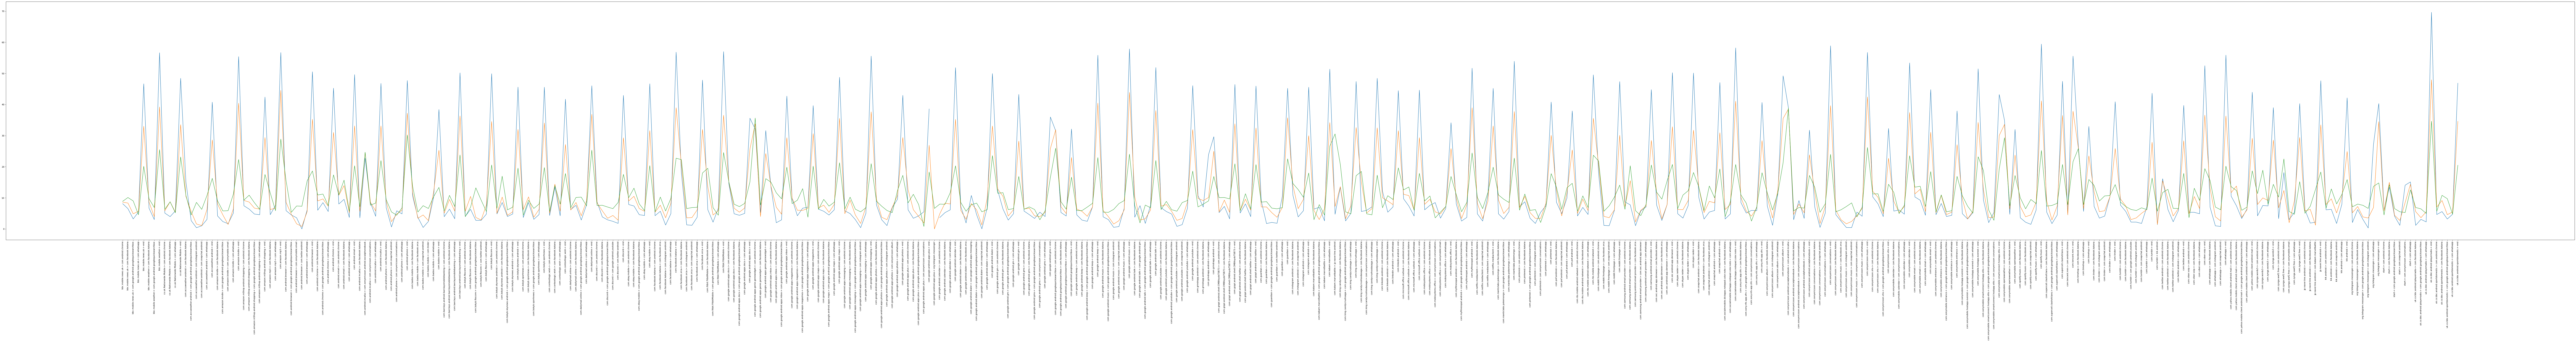

In [119]:
plt.figure(figsize=(210, 20), dpi=80)
plt.plot(commoparable_transitions_top.transition,commoparable_transitions_top.group1)
plt.plot(commoparable_transitions_top.transition,commoparable_transitions_top.group2)
plt.plot(commoparable_transitions_top.transition,commoparable_transitions_top.group3)
#plt.plot(['{} -> {}'.format(i[1], i[0]) for i in commoparable_transitions_top.index],commoparable_transitions_top.group2)
#plt.plot(['{} -> {}'.format(i[1], i[0]) for i in commoparable_transitions_top.index],commoparable_transitions_top.group3)
plt.xticks(rotation=90)
plt.savefig("session_length_transition_matrix_analyse_union_fre_apps.pdf", 
               bbox_inches='tight', 
               transparent=True,
               pad_inches=1)

# visualization

In [123]:
df_transaction_s1 = pd.read_csv('df_transaction_s1_all_fre_apps.csv')
df_transaction_s2 = pd.read_csv('df_transaction_s2_all_fre_apps.csv')
df_transaction_s3 = pd.read_csv('df_transaction_s3_fre_apps.csv')

df_transaction_s1 = df_transaction_s1.drop('Unnamed: 0', 1)
df_transaction_s2 = df_transaction_s2.drop('Unnamed: 0', 1)
df_transaction_s3 = df_transaction_s3.drop('Unnamed: 0', 1)

df_transaction_s1['group']='group1'
df_transaction_s2['group']='group2'
df_transaction_s3['group']='group3'

<ipython-input-123-dc9cb7aa45d1>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_transaction_s1 = df_transaction_s1.drop('Unnamed: 0', 1)
<ipython-input-123-dc9cb7aa45d1>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_transaction_s2 = df_transaction_s2.drop('Unnamed: 0', 1)
<ipython-input-123-dc9cb7aa45d1>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_transaction_s3 = df_transaction_s3.drop('Unnamed: 0', 1)


In [125]:
df_transaction = pd.concat([df_transaction_s1,df_transaction_s2,df_transaction_s3])

In [126]:
df_transaction['transition'] = df_transaction["package_name"] +  ' - '+ df_transaction["next_app"] 

In [129]:
df_transaction = df_transaction.drop(['next_app','package_name'],axis=1)  

In [130]:
df_transaction

probability   group  \
0        1.367310  group1   
1        0.013420  group1   
2        0.020875  group1   
3        0.102138  group1   
4        0.224406  group1   
...           ...     ...   
8195     0.349514  group3   
8196     0.456024  group3   
8197     0.168584  group3   
8198     0.087779  group3   
8199     0.187539  group3   

                                                  transition  
0                    bbc.mobile.news.uk - bbc.mobile.weather  
1               bbc.mobile.news.uk - co.uk.Nationwide.Mobile  
2               bbc.mobile.news.uk - com.accuweather.android  
3                     bbc.mobile.news.uk - com.amazon.kindle  
4     bbc.mobile.news.uk - com.amazon.mShop.android.shopping  
...                                                      ...  
8195                           start - jp.naver.line.android  
8196                                     start - kik.android  
8197                          start - org.telegram.messenger  
8198                  start - uk.co.bbc.android.iplayerradio  
8199                 start - uk.co.bbc.android.sportdomestic  

[24692 rows x 3 columns]

In [ ]:
commoparable_transitions=df_transition.pivot(index=['transition'],columns='group',values='probability')

In [121]:

df_transaction_s3_top=df_transaction_s3.nlargest(300,'probability')
df_transaction_s1_top=df_transaction_s1.nlargest(300,'probability')
df_transaction_s2_top=df_transaction_s2.nlargest(300,'probability')

In [113]:
df_transaction_s3_top

package_name  \
5801   com.sonyericsson.android.socialphonebook   
2224  com.google.android.apps.genie.geniewidget   
8016             uk.co.bbc.android.iplayerradio   
4135                     com.kabam.marvelbattle   
1053                          com.android.phone   
...                                         ...   
4939                              com.pinterest   
894                        com.android.incallui   
3127                     com.google.android.gms   
3663                      com.grindrapp.android   
1700                                com.discord   

                                     next_app  probability  
5801                     com.android.incallui    38.872696  
2224                       com.android.chrome    35.650059  
8016                                      end    34.631963  
4135                    jp.naver.line.android    30.549703  
1053                                      end    30.221530  
...                                       ...          ...  
4939                             com.whatsapp     7.109757  
894                       com.facebook.katana     7.105153  
3127                      com.facebook.katana     7.092028  
3663                       com.android.chrome     7.090918  
1700  com.google.android.googlequicksearchbox     7.055730  

[300 rows x 3 columns]

In [119]:
df_transaction_s1_top = df_transaction_s1_top.sort_values(by=['transition'])
df_transaction_s2_top = df_transaction_s2_top.sort_values(by=['transition'])
df_transaction_s3_top = df_transaction_s3_top.sort_values(by=['transition'])

In [120]:
df_transaction_s3_top

package_name  \
7                  bbc.mobile.news.uk   
20                 bbc.mobile.news.uk   
35                 bbc.mobile.news.uk   
86                 bbc.mobile.news.uk   
112                bbc.mobile.weather   
...                               ...   
8191                            start   
8016   uk.co.bbc.android.iplayerradio   
8041  uk.co.bbc.android.sportdomestic   
8056  uk.co.bbc.android.sportdomestic   
8103  uk.co.bbc.android.sportdomestic   

                                     next_app  probability  \
7                          com.android.chrome     8.892506   
20                        com.facebook.katana    10.114631   
35    com.google.android.googlequicksearchbox     9.013808   
86                                        end    20.140307   
112                       com.facebook.katana     9.723420   
...                                       ...          ...   
8191                             com.whatsapp    12.582359   
8016                                      end    34.631963   
8041                      com.facebook.katana    10.815917   
8056  com.google.android.googlequicksearchbox     9.734910   
8103                                      end    20.492394   

                                                                     transition  \
7                                       bbc.mobile.news.uk - com.android.chrome   
20                                     bbc.mobile.news.uk - com.facebook.katana   
35                 bbc.mobile.news.uk - com.google.android.googlequicksearchbox   
86                                                     bbc.mobile.news.uk - end   
112                                    bbc.mobile.weather - com.facebook.katana   
...                                                                         ...   
8191                                                       start - com.whatsapp   
8016                                       uk.co.bbc.android.iplayerradio - end   
8041                      uk.co.bbc.android.sportdomestic - com.facebook.katana   
8056  uk.co.bbc.android.sportdomestic - com.google.android.googlequicksearchbox   
8103                                      uk.co.bbc.android.sportdomestic - end   

       group  
7     group3  
20    group3  
35    group3  
86    group3  
112   group3  
...      ...  
8191  group3  
8016  group3  
8041  group3  
8056  group3  
8103  group3  

[300 rows x 5 columns]

In [27]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('session length transion matrix analyse.pdf') as pdf:
    plt.figure(figsize=(110, 20), dpi=80)
    plt.plot(df_transaction_s1.transition,df_transaction_s1.probability,label='group with session length 1')
    plt.plot(df_transaction_s2_filtered.transition,df_transaction_s2_filtered.probability,label='group with session length 2')
    plt.plot(df_transaction_s3_filtered.transition,df_transaction_s3_filtered.probability,label='group with session length greater than 2')

    plt.xticks(fontsize=16, rotation=90)
    plt.yticks(fontsize=35)
    plt.legend(fontsize=35) 
    plt.margins(x=0.001)
    pdf.savefig()
    
    plt.close()

In [118]:
    plt.figure(figsize=(150, 30), dpi=80)
    plt.plot(df_transaction_s1_top.transition,df_transaction_s1_top.probability,label='group with session length 1')
    plt.plot(df_transaction_s2_top.transition,df_transaction_s2_top.probability,label='group with session length 2')
    plt.plot(df_transaction_s3_top.transition,df_transaction_s3_top.probability,label='group with session length greater than 2')

    plt.xticks(fontsize=16, rotation=90)
    plt.yticks(fontsize=35)
    plt.legend(fontsize=35) 
    plt.margins(x=0.001)

#plt.savefig("session length transion matrix analyse.pdf"，bbox_inches = "tight")
#,width=750, height=1000
plt.savefig("session_length_transition_matrix_analyse_union_fre_apps.pdf", 
               bbox_inches='tight', 
               transparent=True,
               pad_inches=1)

NameError: name 'df_transaction_s1_top' is not defined

<Figure size 12000x2400 with 0 Axes>

## NMF analyse

In [5]:
df_transaction_g1=df_transaction_s1.rename(columns={'probability':'probability_g1'})
df_transaction_g2=df_transaction_s2.rename(columns={'probability':'probability_g2'})
df_transaction_g3=df_transaction_s3.rename(columns={'probability':'probability_g3'})


t1=df_transaction_g1.set_index(['package_name','next_app'])
t2=df_transaction_g2.set_index(['package_name','next_app'])
t3=df_transaction_g3.set_index(['package_name','next_app'])


full_transition_matrix=pd.concat([t1,t2,t3],axis=1).reset_index().fillna(0)

In [6]:
df_transaction_g1

package_name                              next_app  probability_g1
0    bbc.mobile.news.uk                    com.android.chrome        8.142725
1    bbc.mobile.news.uk                     com.android.email        0.184892
2    bbc.mobile.news.uk                  com.android.incallui        0.281812
3    bbc.mobile.news.uk                       com.ebay.mobile        0.310888
4    bbc.mobile.news.uk                   com.facebook.katana        6.541318
..                  ...                                   ...             ...
749               start                  com.sonymobile.email        2.429376
750               start                     com.spotify.music        1.153417
751               start                   com.twitter.android        0.816738
752               start                          com.whatsapp       15.115575
753               start  com.yahoo.mobile.client.android.mail        0.523465

[754 rows x 3 columns]

In [7]:
X=full_transition_matrix[['probability_g1','probability_g2','probability_g3']]

model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

In [8]:
H

array([[0.92993462, 0.58348038, 0.35597542],
       [0.        , 2.01352343, 1.91109833]])

In [9]:
W=pd.DataFrame(W)

In [10]:
W

0          1
0     0.045497   0.386534
1     0.000000   0.007520
2     0.000000   0.013537
3     0.010569   0.022206
4     0.006658   0.145706
...        ...        ...
8260  0.000000   0.003381
8261  1.449871  13.770028
8262  0.000000   0.012327
8263  0.000000   0.043287
8264  0.016370   0.034394

[8265 rows x 2 columns]

In [11]:
pd.DataFrame(W[0].nlargest(50)).join(full_transition_matrix).rename(columns={0:'factor 0'})

factor 0                              package_name  \
6802  64.030295                         com.spotify.music   
5990  63.434426            com.sonyericsson.conversations   
1923  61.352326                       com.facebook.katana   
6080  61.250443                    com.sonyericsson.music   
7502  60.305308                              com.whatsapp   
2647  60.099214         com.google.android.apps.messaging   
4855  58.141536                 com.nianticlabs.pokemongo   
6260  57.471615                   com.sonymobile.calendar   
853   53.417382                         com.android.email   
5809  53.156901                    com.sonyericsson.album   
2557  52.677944              com.google.android.apps.maps   
2016  51.712583                         com.facebook.orca   
5545  50.622100                      com.snapchat.android   
86    50.333340                        bbc.mobile.news.uk   
945   50.245699                      com.android.incallui   
1830  50.154450                           com.ebay.mobile   
3643  49.771304                com.google.android.youtube   
4076  49.084281                     com.instagram.android   
765   48.946277                        com.android.chrome   
6352  48.352613                      com.sonymobile.email   
4485  48.049711              com.microsoft.office.outlook   
7594  47.217518      com.yahoo.mobile.client.android.mail   
3088  46.598465                     com.google.android.gm   
5717  43.749413                     com.sony.nfx.app.sfrc   
7319  42.783700                       com.twitter.android   
5825  40.706425  com.sonyericsson.android.socialphonebook   
3274  34.352835   com.google.android.googlequicksearchbox   
5899  34.001596  com.sonyericsson.android.socialphonebook   
3195  33.663982   com.google.android.googlequicksearchbox   
923   23.764065                      com.android.incallui   
1950  18.379842                         com.facebook.orca   
7240  17.303587                       com.twitter.android   
8094  15.994683                                     start   
8077  14.954196                                     start   
8031  14.081533                                     start   
3009  13.158561                     com.google.android.gm   
5805  11.857708                    com.sonyericsson.album   
4010  11.296495                     com.instagram.android   
7516  10.757272      com.yahoo.mobile.client.android.mail   
5479  10.624369                      com.snapchat.android   
6274  10.498191                      com.sonymobile.email   
4407   9.961368              com.microsoft.office.outlook   
791    9.725036                         com.android.email   
5878   9.673881  com.sonyericsson.android.socialphonebook   
6287   9.529119                      com.sonymobile.email   
924    8.917597                      com.android.incallui   
5652   8.747311                     com.sony.nfx.app.sfrc   
713    8.658876                        com.android.chrome   
7      8.470927                        bbc.mobile.news.uk   
779    8.341667                         com.android.email   

                                      next_app  probability_g1  \
6802                                       end       59.407374   
5990                                       end       58.864732   
1923                                       end       56.816252   
6080                                       end       56.735127   
7502                                       end       55.874964   
2647                                       end       55.565392   
4855                                       end       53.892953   
6260                                       end       53.373680   
853                                        end       49.609367   
5809                                       end       49.213430   
2557                                       end       48.756533   
2016                                       end       47.848286   
5545                                 

In [12]:
pd.DataFrame(W[1].nlargest(50)).join(full_transition_matrix).rename(columns={1:'factor 1'})

factor 1                                package_name  \
601   18.425202                              com.amazon.mp3   
1038  17.072902                           com.android.phone   
3458  16.931206                    com.google.android.music   
179   16.236718                          bbc.mobile.weather   
6633  15.978214                com.sonymobile.xperiaweather   
4670  15.884756                    com.myfitnesspal.android   
3367  15.822281                     com.google.android.keep   
1653  15.637816                        com.dailymail.online   
2109  15.351189                     com.fitbit.FitbitMobile   
1213  15.092412  com.barclays.android.barclaysmobilebanking   
3550  15.003316                     com.google.android.talk   
5127  14.885345              com.rbs.mobile.android.natwest   
6963  14.848782                              com.tencent.mm   
3983  14.604030                                com.guardian   
6528  14.438973              com.sonymobile.hostapp.everest   
6885  14.278095                  com.supercell.clashofclans   
7409  13.936349                              com.viber.voip   
2923  13.860916                 com.google.android.calendar   
8261  13.770028             uk.co.bbc.android.sportdomestic   
3805  13.713865      com.grppl.android.shell.CMBlloydsTSB73   
1477  13.438993                         com.bskyb.sportnews   
3896  13.327136             com.grppl.android.shell.halifax   
4762  13.251965                     com.netflix.mediaclient   
7835  12.905668                       jp.naver.line.android   
1386  12.898569                   com.bskyb.skynews.android   
4393  12.830635                        com.linkedin.android   
5452  12.454504                            com.skype.raider   
6620  12.377137   com.sonymobile.smartconnect.hostapp.ellis   
4219  12.376651                     com.king.candycrushsaga   
2377  12.362131               com.google.android.apps.inbox   
5290  12.345908          com.samsung.android.email.provider   
4946  11.968612                               com.pinterest   
509   11.727582           com.amazon.mShop.android.shopping   
2740  11.649827              com.google.android.apps.photos   
8172  11.237636              uk.co.bbc.android.iplayerradio   
7226  11.046621                                  com.tumblr   
6442  11.022112                     com.sonymobile.entrance   
5211  10.949080                        com.reddit.frontpage   
5138  10.771340                        com.reddit.frontpage   
4578  10.722873                      com.mobisystems.office   
3181  10.655436                      com.google.android.gms   
6709  10.322440                com.sonymobile.xperiaweather   
7927  10.221358                                 kik.android   
2202  10.209097                com.google.android.apps.docs   
7134  10.005632                                  com.tinder   
5037  10.004953                             com.pof.android   
5825   9.906568    com.sonyericsson.android.socialphonebook   
417    9.472179                           com.amazon.kindle   
6170   9.291589                        com.sonyericsson.xhs   
5236   9.095863          com.samsung.android.email.provider   

                  next_app  probability_g1  probability_g2  probability_g3  
601                    end        0.000000       44.543982       28.894909  
1038                   end        0.000000       37.211568       30.221530  
3458                   end        0.000000       43.882866       24.048490  
179                    end        0.000000       39.208083       25.501142  
6633    com.android.chrome        0.000000       33.599828       29.323783  
4670                   end        0.000000       38.953363       24.443373  
3367                   end        0.000000       40.450651       22.946898  
1653                   end        0.000000       36.848025       25.335858  
2109                   end        0.000000       36.539226       24.560441  
1213                   